In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.mlab as mlab
import scipy.optimize as opt
import itertools as it
import scipy.stats as stats
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## Machine Learning Coursework

Ben Norris - bn15932  
Bilal Kazi - bk15841  
Kyle Welch - kw15  
Greg Sims  - gs15  

### 1 ###
a) Due to central limit theorem, assuming a gaussian distribution is usually the best idea.

b) A spherical (or isotropic) covariance matrix is when the covariance matrix is proportional to the identity matrix, which means it is diagonal, and all diagonal elements are exactly the same. 

### 2 ###

$$
p(\mathbf{Y} | f, \mathbf{X}) = p(\bigcap_i^N (y_i | f, x_i))
$$

### 3 ###

$$
p(\mathbf{Y} | \mathbf{X}, \mathbf{W}) = \prod_{n=1}^{N} N(y_i | w^T\phi(x_n), \sigma^2 I)
$$


### 4 ###

Conjugate distributions occur when a prior and a posterior distribution are of the same family, in this case the prior is called a conjugate prior.

A conjugate prior is helpful, as if we choose to use a Gaussian conjugate prior, it ensures that our posterior is also a Gaussian, since Gaussian distributions are conjugate to themselves.
A conjugate prior gives a closed-form expression for the posterior, which prevents integration which may be otherwise necessary.
Additionally, conjugate priors can more easily show how a likelihood function updates the prior.

### 5 ###

A Gaussian distribution is parameterised on the L2 distance of a point from the mean of the distribution. If we encode the preference using L1 norm it will change the shape of out prior (Laplace distribution).
The change in shape of prior would also change the value of learned paramaters since different priors mean different things.

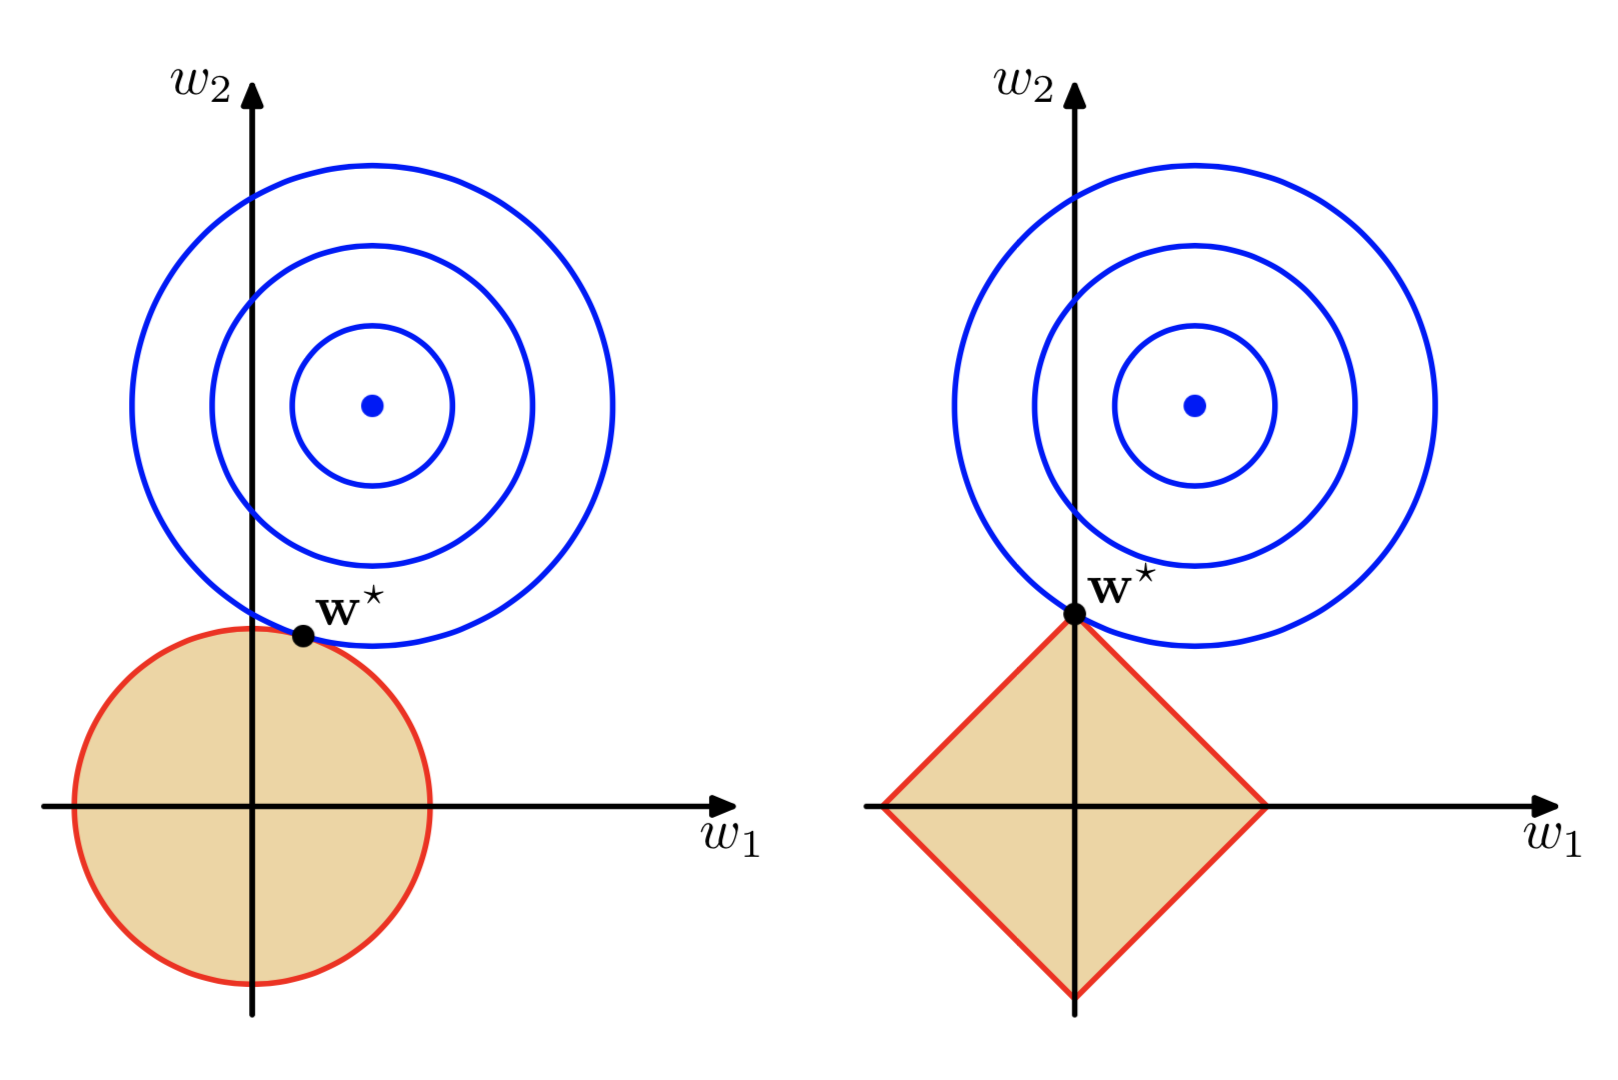
On the left is a prior encoded using L2 norm and right is prior encoded using L1 norm

As you can see in the image the shape of the prior determines the parameters that are learned. The L2 norm places an equal importance in every direction whereas the L1 norm tends to bias parameters more toward the axes. This results in the L1 norm preferring certain dimension more than others.

### 6 ###
a) We can derive our posterior from Bayes Theorem. From this we know
$$ p(\boldsymbol{W} | \boldsymbol{X}, \boldsymbol{Y}) \propto p(\boldsymbol{Y} | \boldsymbol{X}, \boldsymbol{W})p(\boldsymbol{W}) $$
We assume that each observation $\boldsymbol{y_i} \in Y$ is independent from one another, giving
$$ p(Y | X, W) = \prod^{N}_{i=1} p(y_i | \boldsymbol{x_i}, \boldsymbol{W}) $$
We model an observation $y_i$ by the equation $y_i = \boldsymbol{W} \boldsymbol{x_i} + \epsilon$ where $\epsilon$ represents Gaussian noise with $0$ mean and variance $\sigma^2$. Therefore $p(Y | X, W)$ can be modelled:

$$ \prod^N_{i=1} \mathcal{N}(y_i | \boldsymbol{W} \boldsymbol{\phi (x_i)}, \sigma^2 I)$$

To derive the posterior, we shall substitute in the formula for the multivariate Gaussian, then we will focus on just the exponent of the $e$ since
$$p(\boldsymbol{W}| \boldsymbol{X}, \boldsymbol{Y}) \propto \prod^N_{i=1} e^{-\frac{1}{2}(y_i - \boldsymbol{W} \boldsymbol{x_i})^T(\sigma^2 I)^{-1}(y_i - \boldsymbol{W}^T \boldsymbol{x_i})} e^{-\frac{1}{2}(\boldsymbol{W} - \boldsymbol{W_0})^T(\tau^2 I)^{-1}(\boldsymbol{W}-\boldsymbol{W_0})}$$

$$ = e^{-\frac{1}{2}\sum^N_{i=1}((y_i - \boldsymbol{W} \boldsymbol{x_i})^T(\sigma^2 I)^{-1}(y_i - \boldsymbol{W} \boldsymbol{x_i}))} e^{-\frac{1}{2}(\boldsymbol{W} - \boldsymbol{W_0})^T(\tau^2 I)^{-1}(\boldsymbol{W}-\boldsymbol{W_0})} $$

This expands to
$$ e^{\frac{-1}{2 \sigma^2}\boldsymbol{Y}^T \boldsymbol{Y} + \frac{1}{\sigma^2} \boldsymbol{Y}^T (\boldsymbol{X W}) - \frac{1}{2 \sigma^2}(\boldsymbol{X W})^T (\boldsymbol{X W})} e^{-\frac{1}{2\tau^2}\boldsymbol{W}^T\boldsymbol{W} + \frac{1}{\tau^2}\boldsymbol{W}^T\boldsymbol{W_0} - \frac{1}{2\tau^2}\boldsymbol{W_0}^T\boldsymbol{W_0}} $$

Since the posterior is Gaussian, we can use the general form to derive the new parametres of the Gaussian. The exponent of the general form contains 3 key terms, a constant term (A), a mixed term (B) and a term quadratic in the parameters (C). To get the updated variance $\boldsymbol{S}^{-1}$ we set C equal to our term that is quadratic in the parameters:
$$ -\frac{1}{2 \tau^2}\boldsymbol{W}^T\boldsymbol{W} + \frac{1}{\tau^2}\boldsymbol{W}^T\boldsymbol{W_0} - \frac{1}{2\tau^2}\boldsymbol{W_0}^T\boldsymbol{W_0} - \frac{1}{2\sigma^2}(\boldsymbol{XW})^T(\boldsymbol{XW}) = \boldsymbol{W}^T\boldsymbol{S}^{-1}\boldsymbol{W}$$
$$\implies \boldsymbol{S}^{-1} = \frac{1}{\tau^2}\boldsymbol{I} + \frac{1}{\sigma^2}\boldsymbol{X}^T\boldsymbol{X} -\frac{2}{\tau^2} \boldsymbol{W_0}\boldsymbol{W}^{-1} + \frac{1}{\tau^2}\boldsymbol{W}^{-1}\boldsymbol{W_0}^T\boldsymbol{W}^{-1}$$

With this, we can calculate $\boldsymbol{\mu}$ by setting the general mixed term (B), equal to the mixed term in our exponent.
$$\boldsymbol{W}^T\boldsymbol{S}^{-1}\boldsymbol{\mu} = \frac{1}{\sigma^2}\boldsymbol{Y}^T(\boldsymbol{XW})$$
$$\implies \boldsymbol{\mu} = \frac{1}{\sigma^2}\boldsymbol{S}^{-1}\boldsymbol{X}^T\boldsymbol{Y}$$

This gives us the parameters for our posterior disribution so we can state
$$p(\boldsymbol{W}|\boldsymbol{Y}, \boldsymbol{X}) \propto \mathcal{N}(\boldsymbol{\mu},\boldsymbol{S}^{-1}) $$

b) Has the form it does, which should be gaussian, because it is conjugate to the prior.

c) Z is used for normalisation, since the prior and posterior are conjugate, we know they are proportional, so Z is nothing more than a constant and shouldn't affect the actual model (?). Also can't be calculated.

### 7 ###

A non-parametric model is one that assumes the data distribution cannot be defined in terms of some finite parameters, and instead defines them by some infinite dimensional function.

The difference between parametrics and non-parametrics is mainly that the first assumes the model is entirely defined in terms of some finite parameters, which means that the parameters contain all the information on the model, and due to finite parameters, the complexity of the model is bounded and therefore not flexible.
However, for non-parametric models, the model is defined by a function relationship, and so the information the function contains grows as the amount of data grows, putting no bounds on the complexity and allowing the model to be more flexible.

### 8 ###

The prior is conditional on hyperparameter $\theta$ which tunes the kernel function which in turn adjusts the covariance of the Gaussian Process thus dictating the shape of the functions we prefer. This is useful as it allows us to control the types of functions from an infinite space of possible functions.

### 9 ###

This prior encodes all possible functions, and this can be shown by looking at the spherical gaussian as a long line of "slices". Each of these "slices" is a regular gaussian, and therefore never touches zero, stretching from negative to positive infinity. In the same way, we can view the places we can take one of these slices as infinite, as the x-axis stretches from positive to negative infinity, and so we have an infinite function space.

### 10* ###
![Joint distribution graphical model](q10.jpg)
$$p(\boldsymbol{Y}, \boldsymbol{X}, f, \theta) = p(\boldsymbol{X}) p(\theta) p(f|\boldsymbol{X},\theta)p(\boldsymbol{Y}|f)$$
Assumptions:
- All X's are independent, shown by the $k(\pmb X, \pmb X)$

### 11* ###

a)

b)

c) It implies that the output is dependent on both the input data (X) as well as the function (the parameters, theta)

### 12 ###

On the left is the visualisation of the prior/posterior and on the right you can see a sample of functions from the prior/posterior.  
Adding the first data point we see that the posterior shifts and becomes smaller and the functions seem to pass through the general area of the data point. On adding more data points the posterior starts to converge on the parameters and the functions move closer together and are very closely aligned to the direction of the data points.

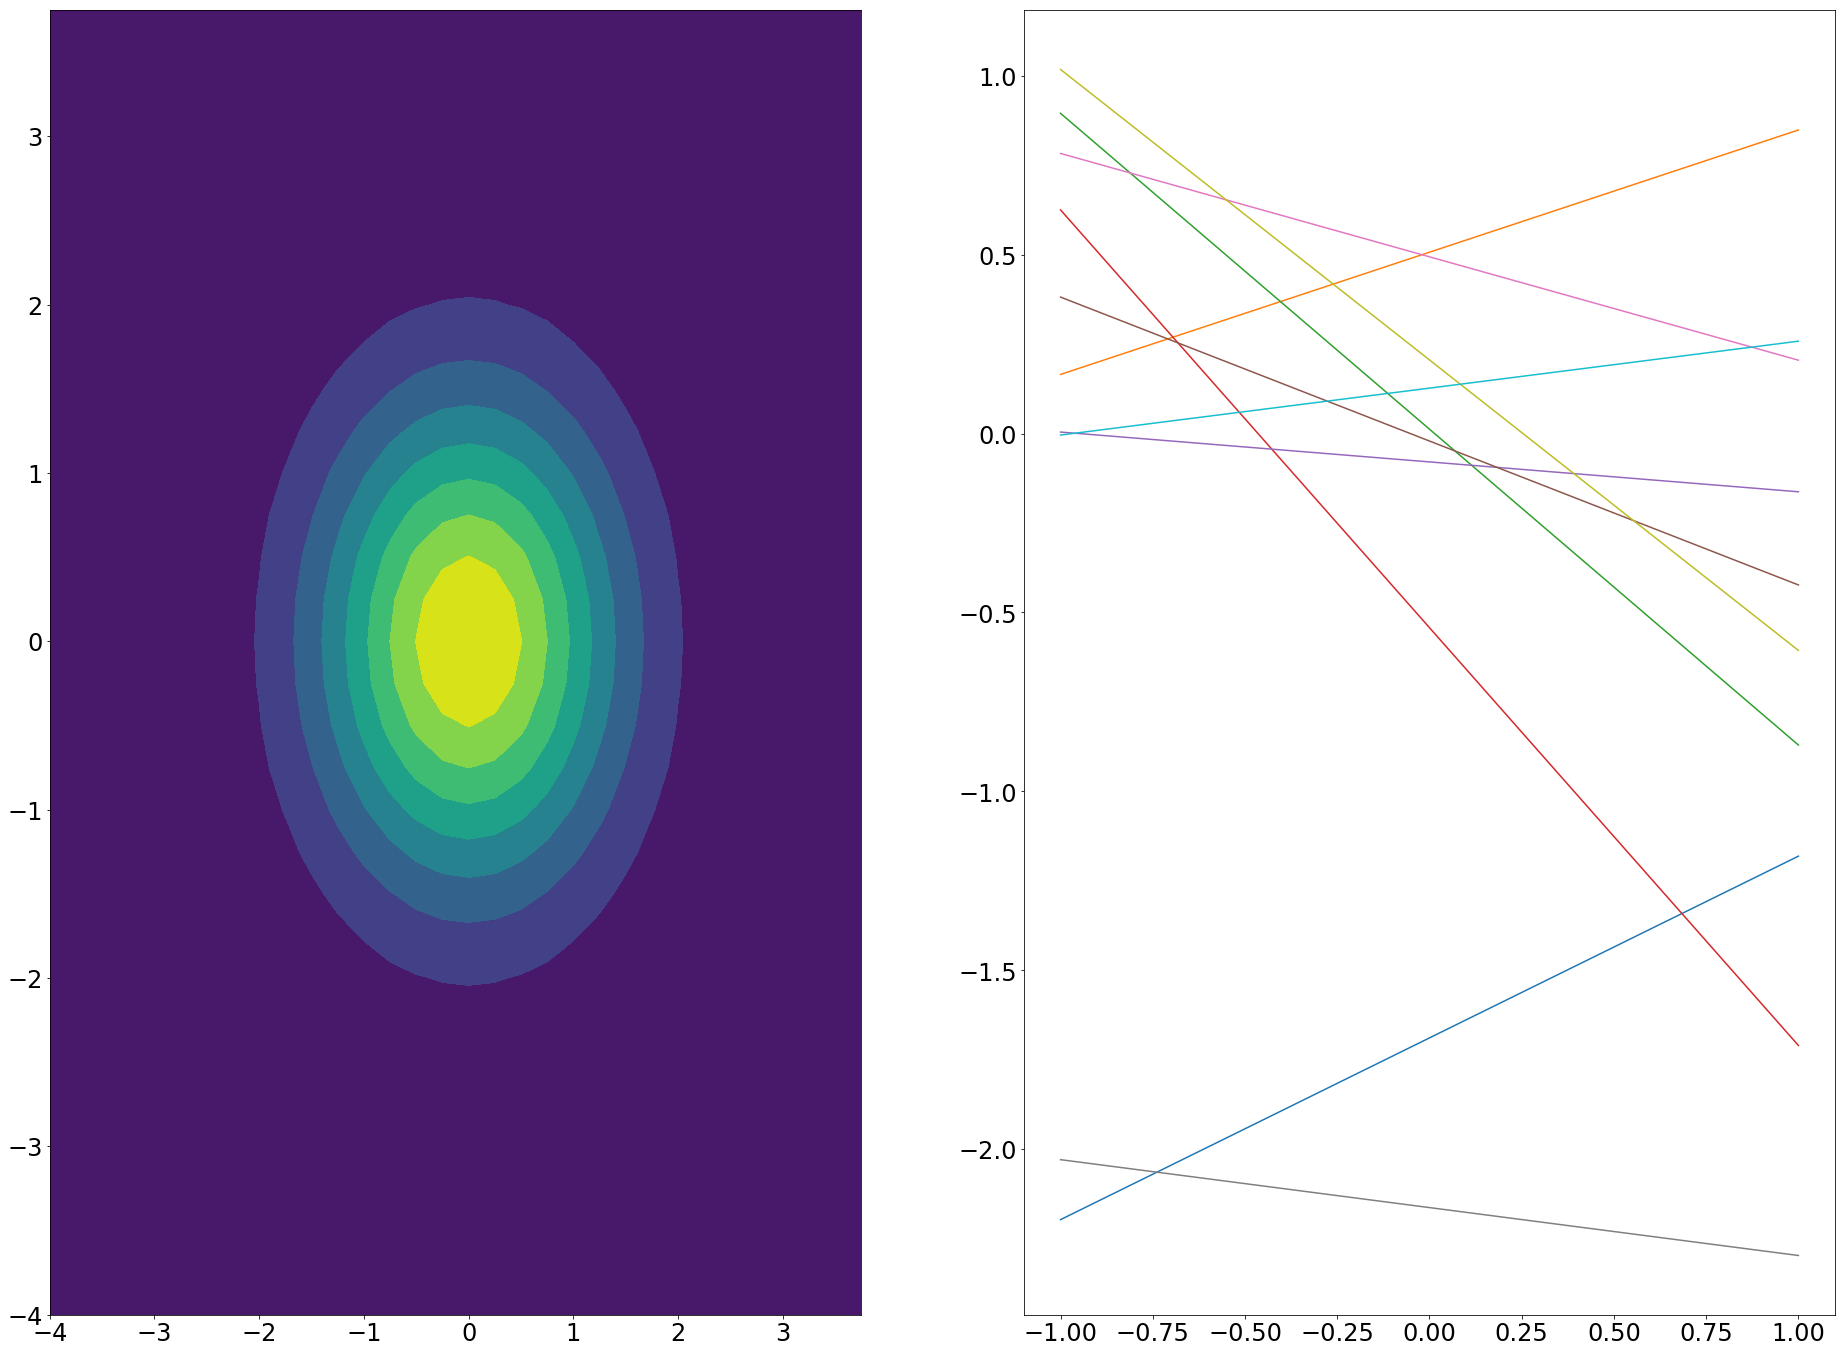

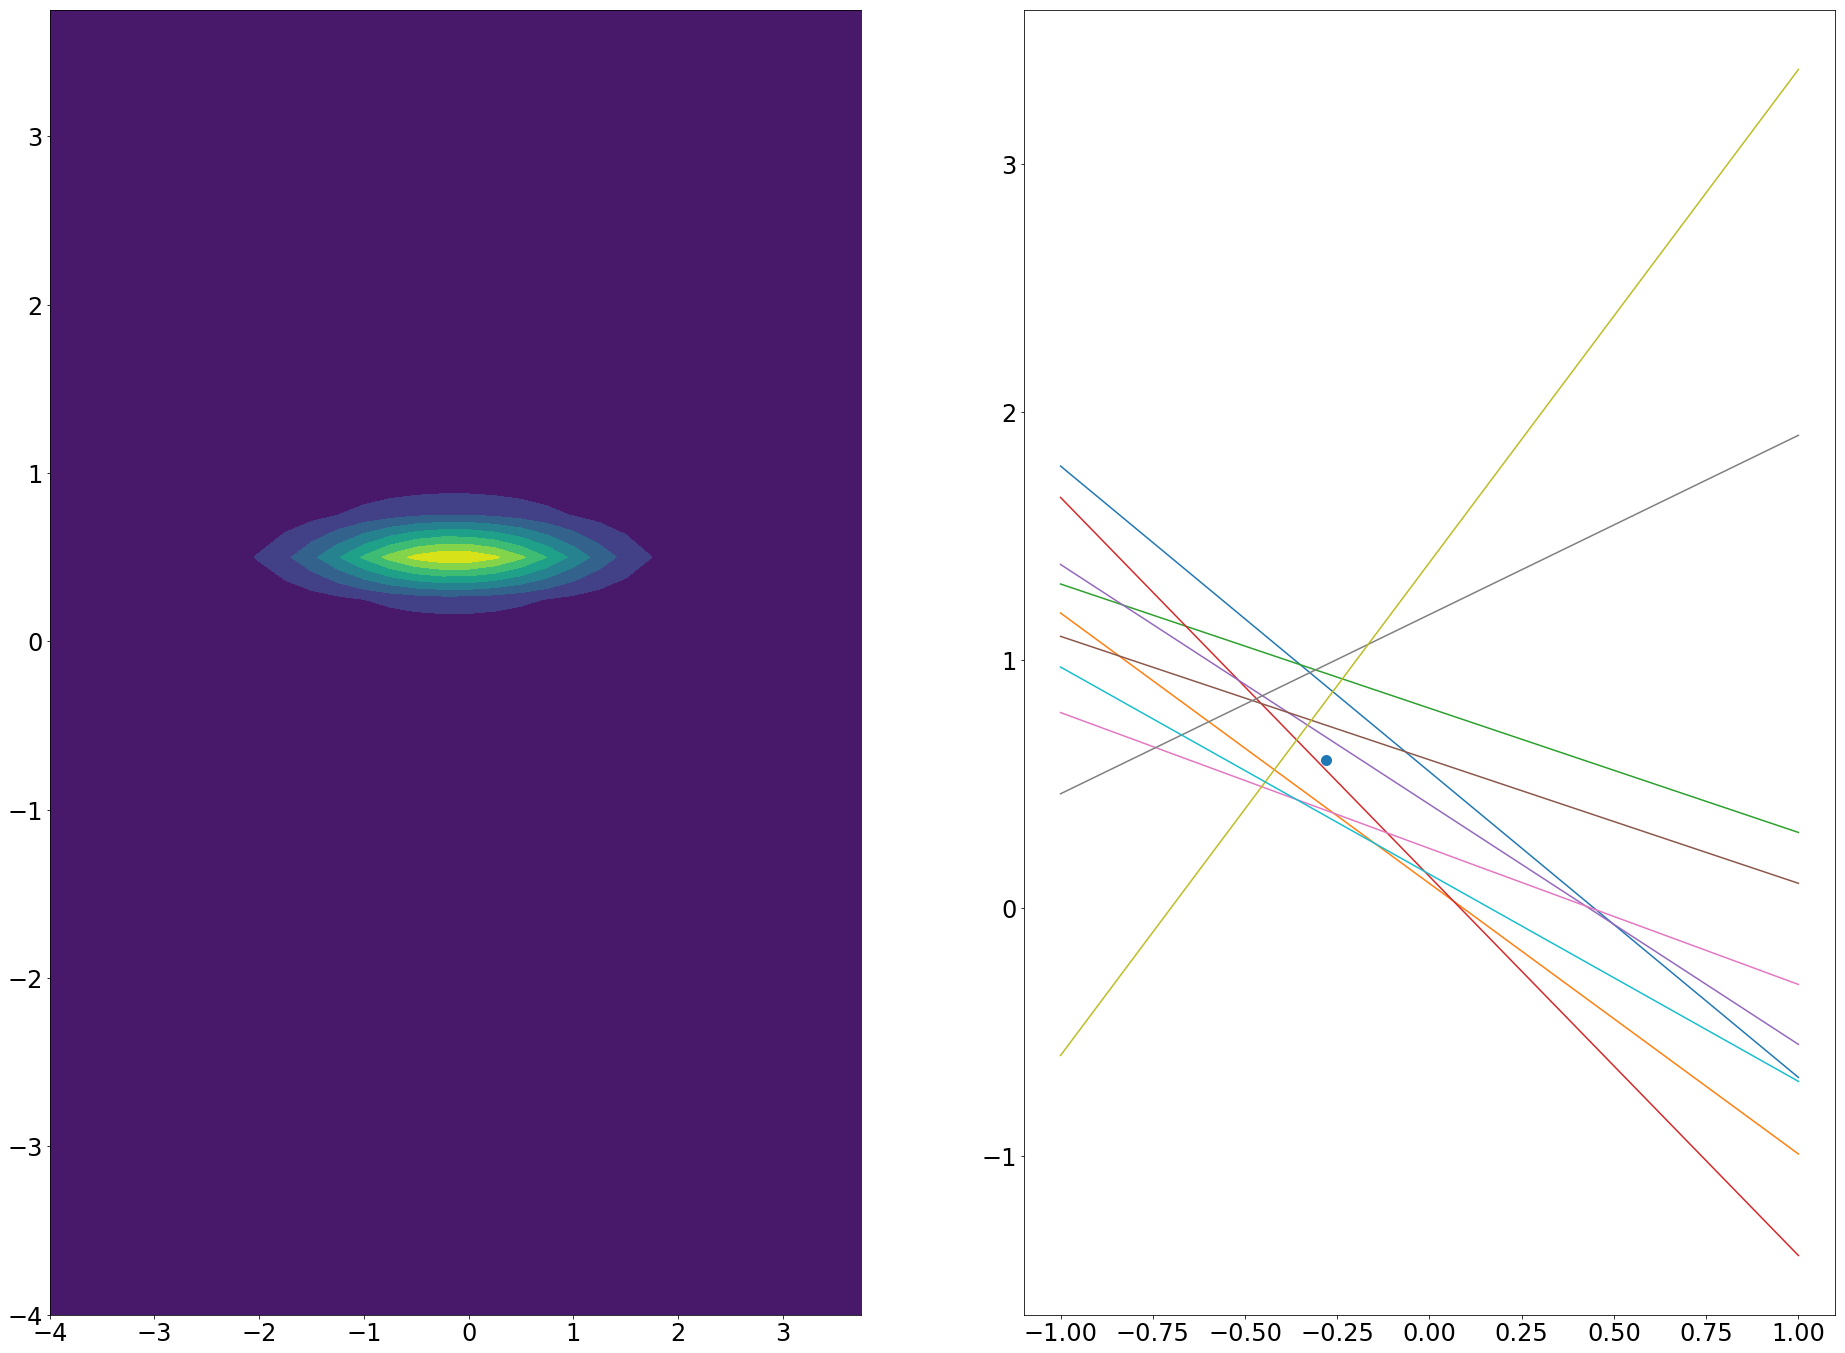

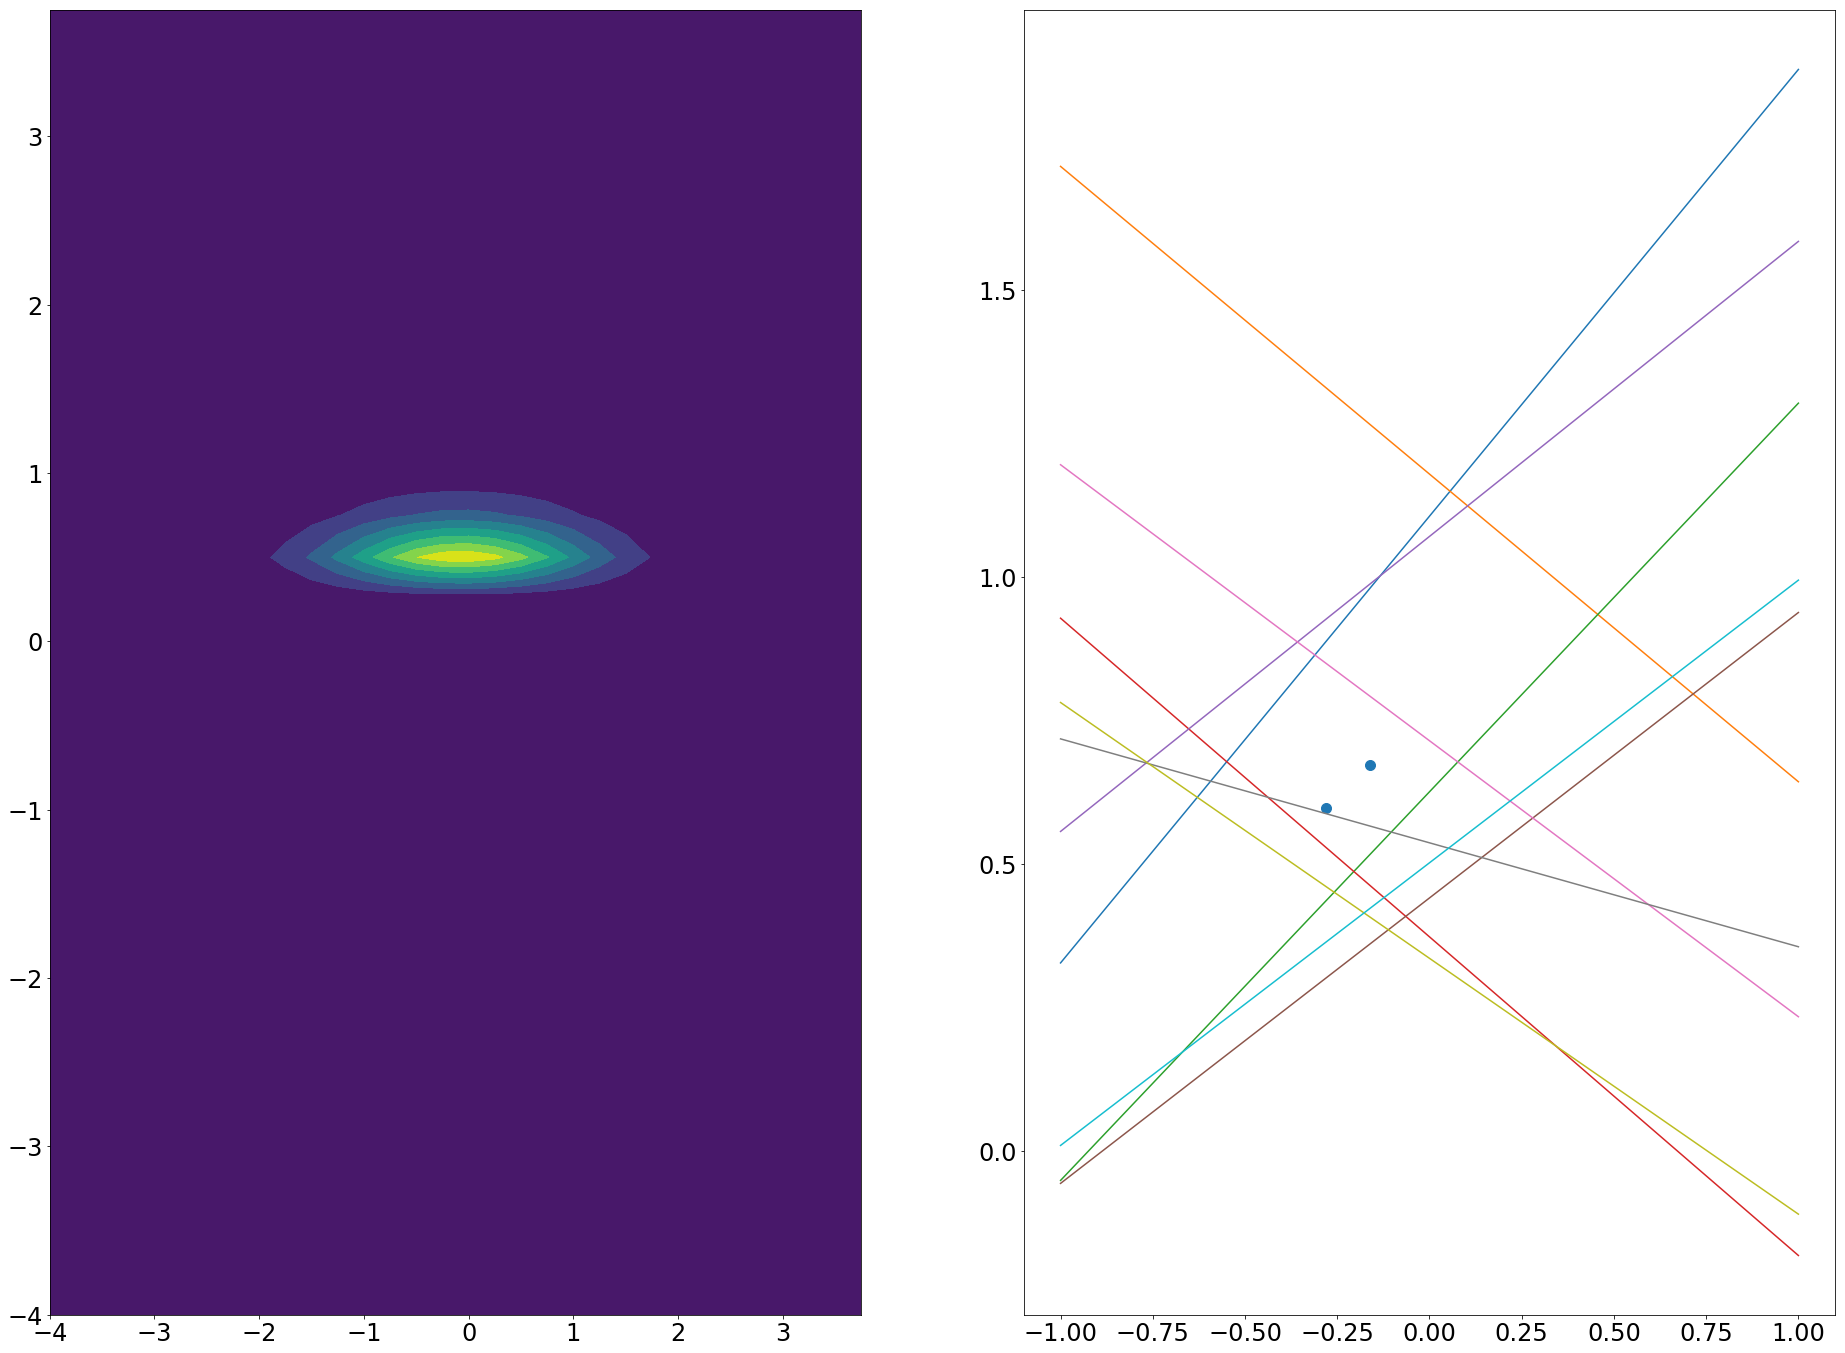

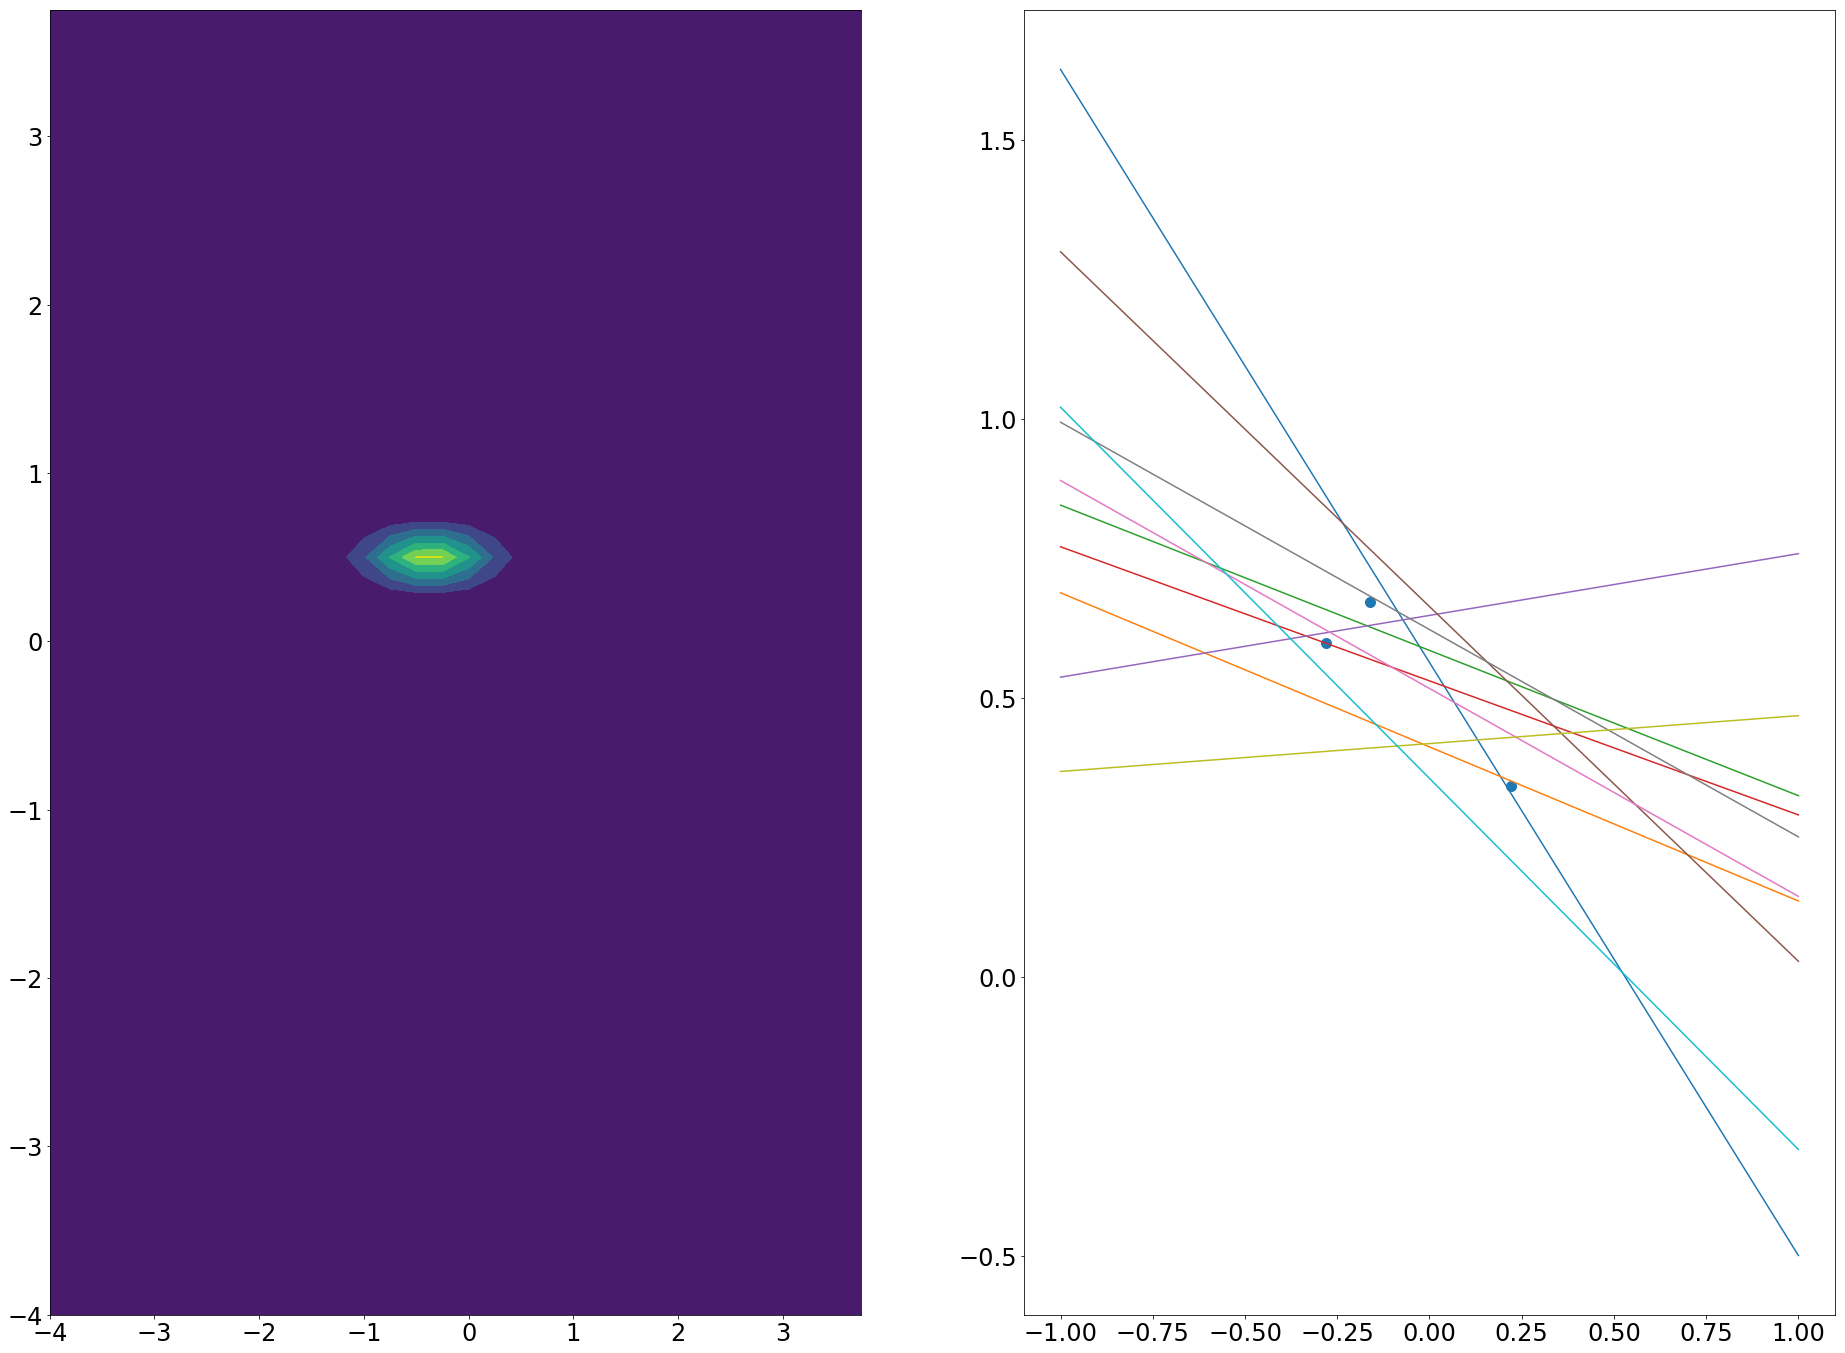

In [2]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def y_i(w, x):
    epsilon = np.random.normal(0, 0.3)
    return np.dot(w, x) + epsilon

def visualise(ax, mu, cov):
    for i in range(10):
        w = np.random.multivariate_normal(mu, cov)
        ax.plot([-1, 1], [np.dot(w, [-1, 1]), np.dot(w, [1, 1])])

tau = 1
beta = (1/0.3) ** 2
w0 = [0, 0]

x = np.arange(0.01, 1.01, 0.01)
x = np.concatenate(((np.multiply(-1, list(reversed(x)))), [0], x))
W = [-1.3, 0.5]
y = [y_i(W, [x_i, 1]) for x_i in x]
cov = tau ** 2 * np.identity(2)

delta = 0.25
xr = np.arange(-4.0, 4.0, delta)
yr = np.arange(-4.0, 4.0, delta)
X, Y = np.meshgrid(xr, yr)
Z = mlab.bivariate_normal(X, Y, cov[0, 0], cov[1, 1], w0[0], w0[1])
fig = plt.figure()
ax = fig.add_subplot(121)
ax.contourf(X, Y, Z)
ax = fig.add_subplot(122)
visualise(ax, w0, cov)

xData, yData = unison_shuffled_copies(np.array(x), np.array(y))

mu = [w0]
sigma = [cov]
for i in range(3):
    xBias = np.ones((1, 2))
    xBias[:, 0] = xData[i]
    yCol = np.reshape(yData[i], (-1, 1))
    newSigma = np.linalg.inv(np.linalg.inv(sigma[i]) + beta * np.dot(xBias.T, xBias))
    sigma.append(newSigma)
    newMu = np.dot(newSigma, (np.dot(np.linalg.inv(sigma[i]), np.reshape(mu[i], (2,1))) + beta * np.dot(xBias.T, yCol)))
    newMu = newMu.flatten()
    mu.append(newMu)
    Z = mlab.bivariate_normal(X, Y, sigma[i+1][0][0], sigma[i+1][1][1], mu[i+1][0], mu[i+1][1])
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax.contourf(X, Y, Z)
    ax = fig.add_subplot(122)
    visualise(ax, mu[i+1], sigma[i+1])
    ax.scatter(xData[0:i+1], yData[0:i+1], s=100)

plt.show()

### 13 ###

The first plot has value of length scale equal to 1 while the second one has length scale equal to 2.  
The length scale is directly proportional to the covariance of the Gaussian Process and we see that decreasing the value makes the functions noisier as the covariance decreases.

The length scale encodes the assumption of smoothness of the function

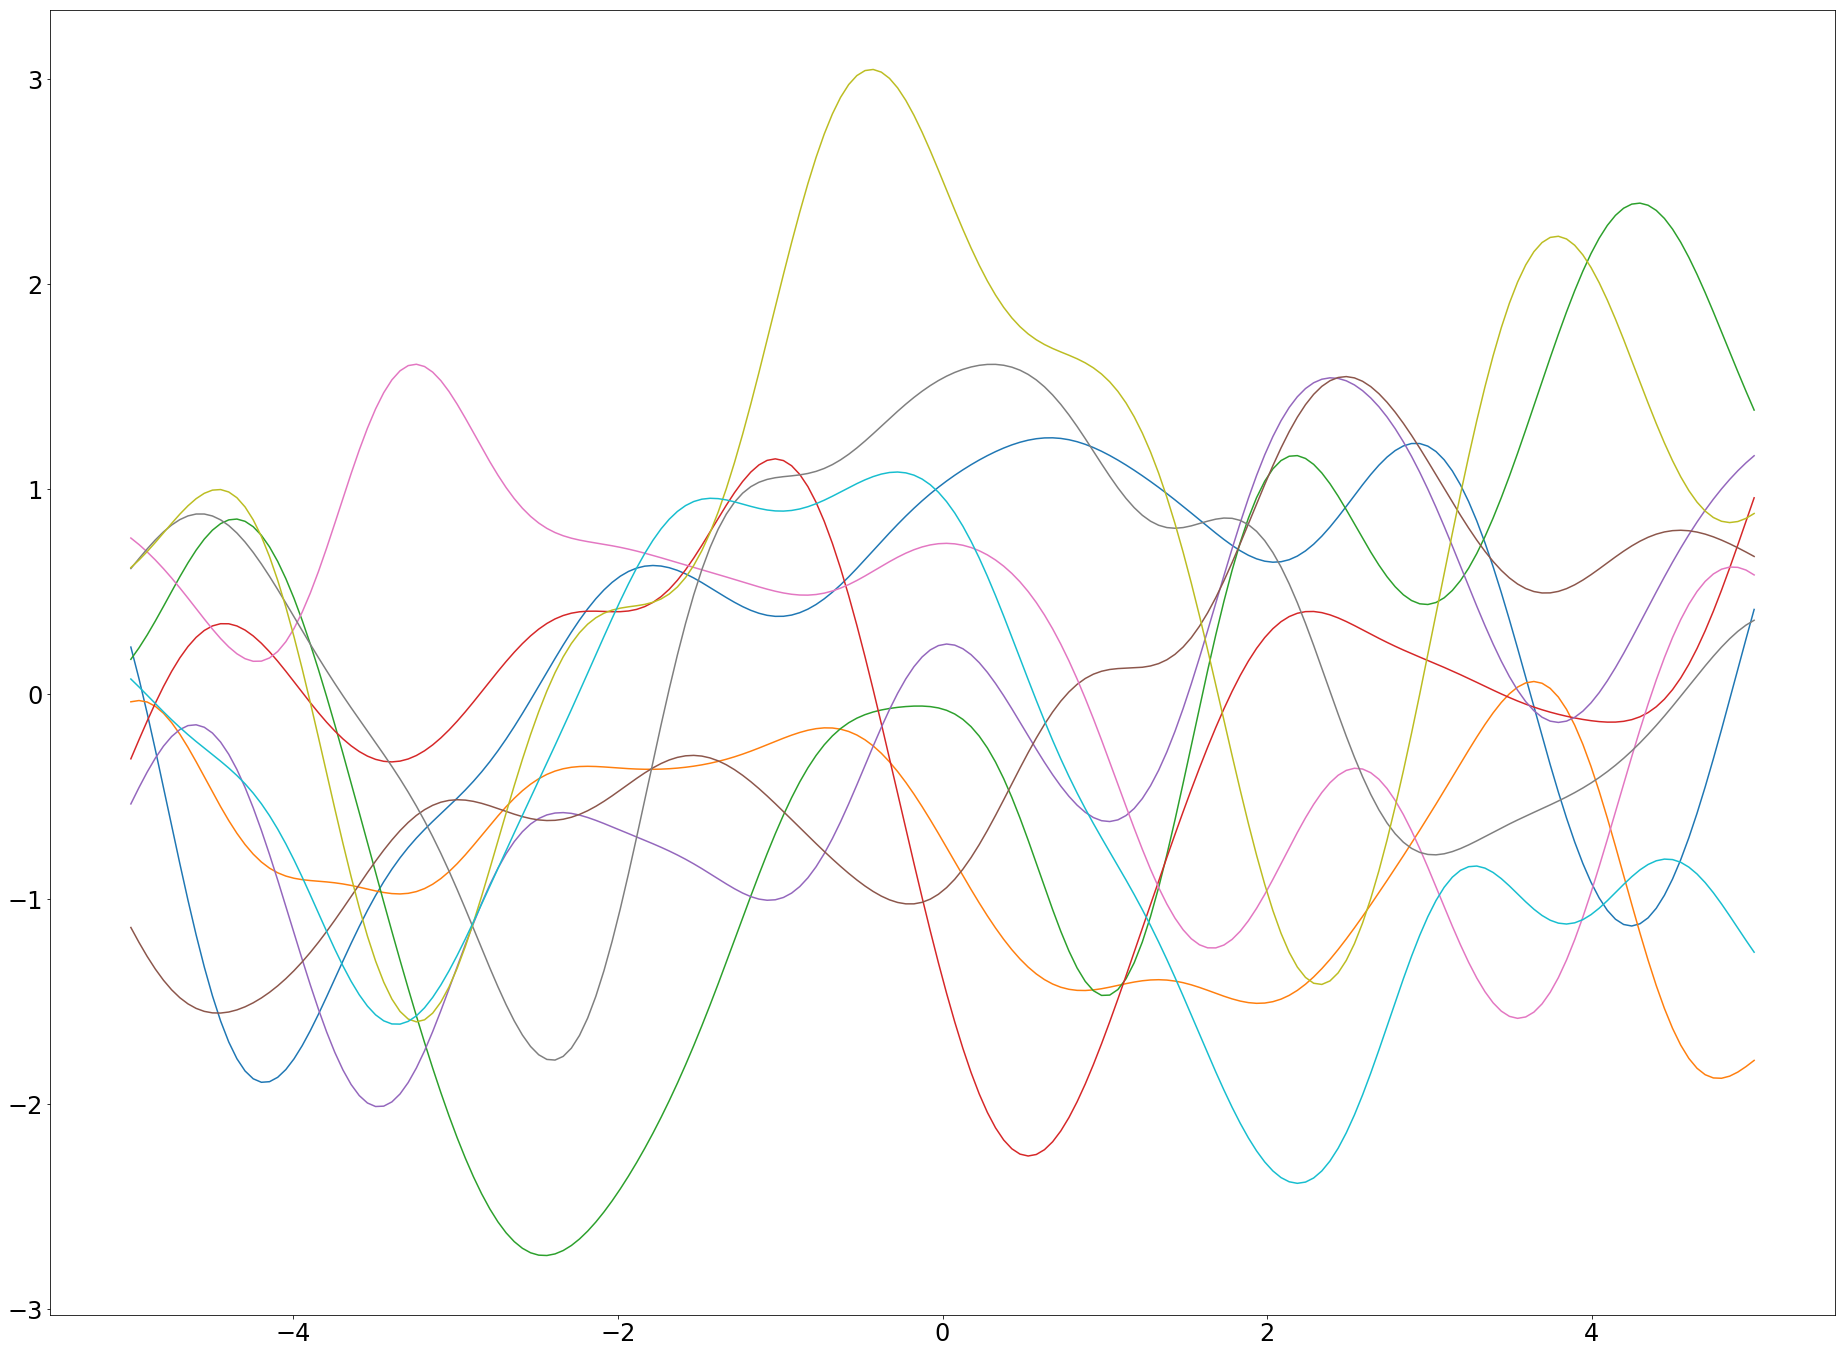

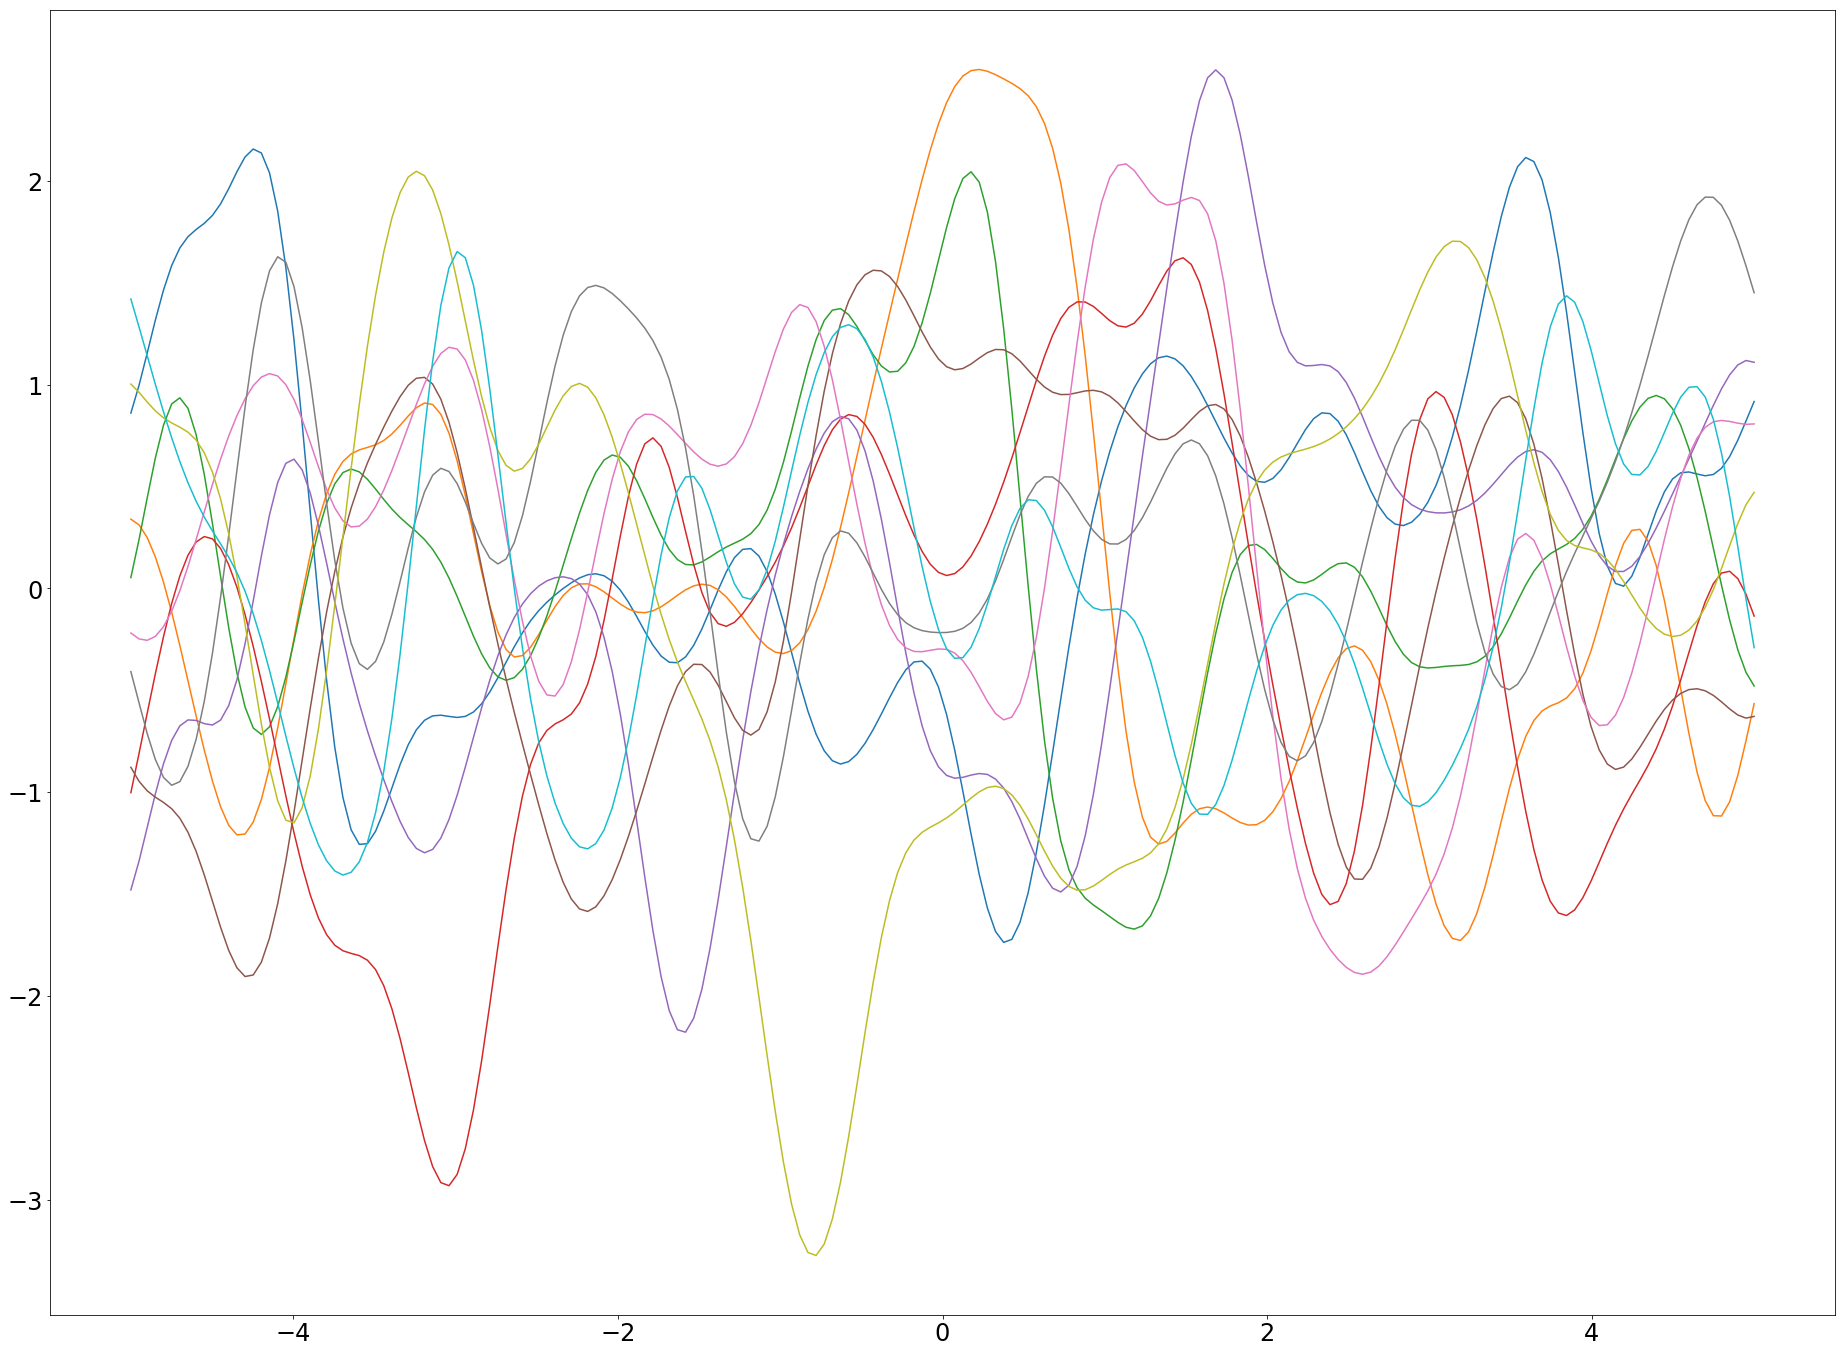

In [3]:
class Kernel:
    def __init__(self, sigma, lengthScale):
        self.sigma = sigma
        self.lengthScale = lengthScale
        
    def __call__(self, x_i, x_j):
        return (self.sigma ** 2) * np.exp(-1 * np.dot(np.transpose(x_i - x_j), (x_i - x_j)) * (1 / self.lengthScale ** 2))

data = np.linspace(-5, 5, 200)
kernel = Kernel(1, 1)
cov = np.reshape([kernel(x,y) for x in data for y in data], (len(data),len(data)))
mu = np.zeros(data.shape)

f = np.random.multivariate_normal(mu, cov, 10)

plt.plot(data, f.T)
plt.show()

kernel = Kernel(1, 0.5)
cov = np.reshape([kernel(x,y) for x in data for y in data], (len(data),len(data)))
mu = np.zeros(data.shape)

f = np.random.multivariate_normal(mu, cov, 10)

plt.plot(data, f.T)
plt.show()

### 14 ###

We can see that the samples from the posterior are less varied near the data points and as we move away from the data points the uncertainity increases and the function starts to resemble the prior. This is desirable since it means that where we see data the model fits to the data and where no data is present it is represented by our prior belief but also has a high uncertainity.

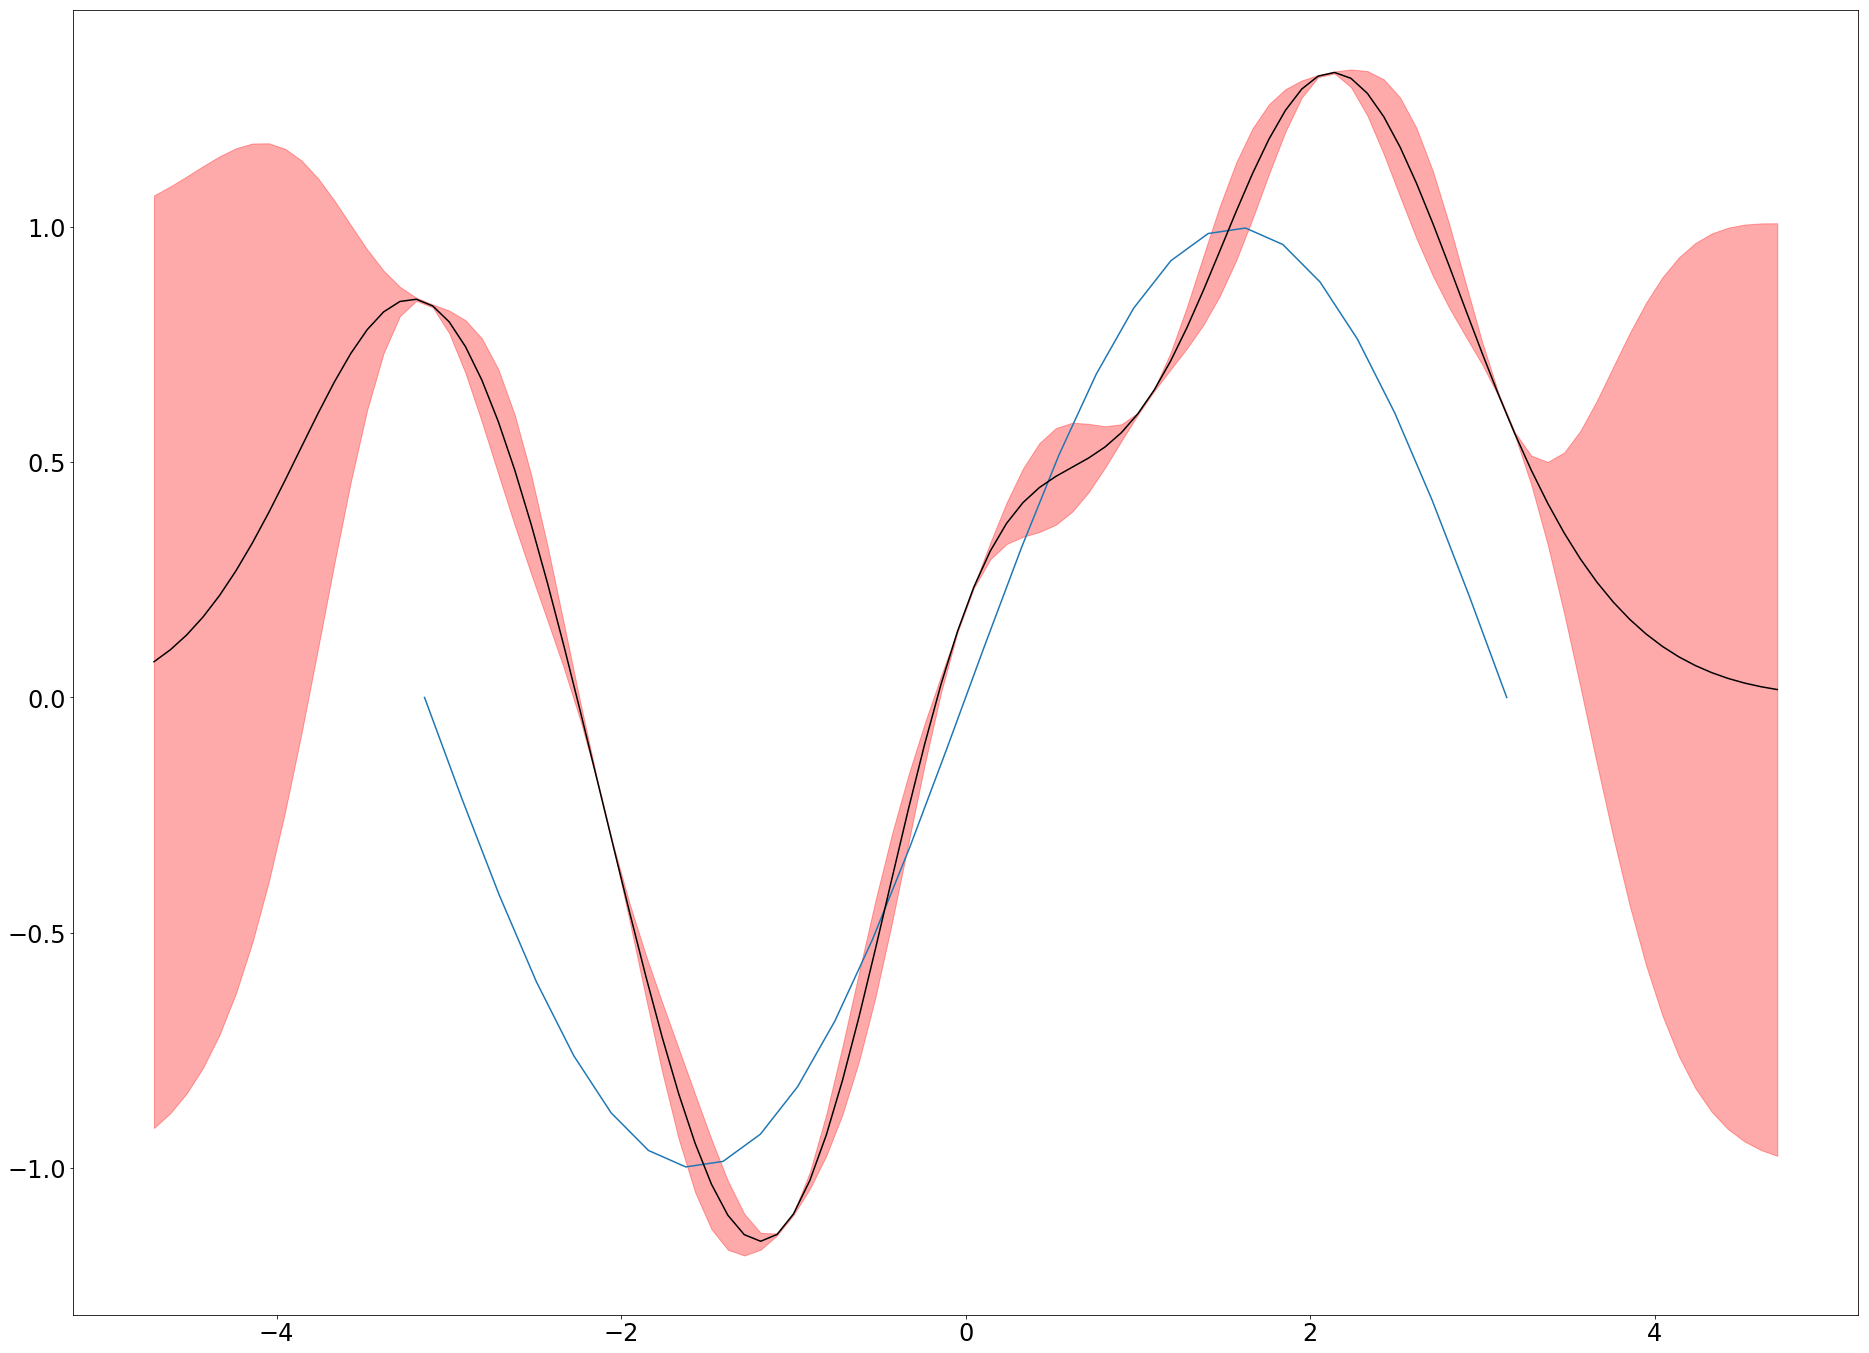

In [4]:
def y_i(x_i):
    return np.sin(x_i) + np.random.normal(0, 0.5)

x = np.linspace(-np.pi, np.pi, 7)
x = np.reshape(x, (-1,1))
y = [y_i(x_i) for x_i in x]
kernel = Kernel(1, 1)
K = np.reshape([kernel(x_i, y_i) for x_i in x for y_i in x], (len(x),len(x)))
mu = np.zeros(x.shape)

xD = np.linspace(-1.5*np.pi, 1.5*np.pi, 100)
yD = []
ySig = []
for i in xD:
    xData = i
    predMu = np.array([kernel(xData, x_i) for x_i in x]).reshape((1, -1)).dot(np.linalg.inv(K)).dot(y)
    predSig = kernel(xData, xData) - np.reshape([kernel(xData, x_i) for x_i in x], (1, -1)).dot(np.linalg.inv(K)).dot(np.reshape([kernel(x_i, xData) for x_i in x], (-1, 1)))
    yD.append(predMu.flatten())
    ySig.append(predSig.flatten())
    
xPlot = np.linspace(-np.pi, np.pi, 30)
xPlot = np.reshape(xPlot, (-1,1))
yPlot = [np.sin(x_i) for x_i in xPlot]
# yPlot = [y_i(x_i) for x_i in xPlot]
# plt.plot(x, y)
plt.plot(xPlot, yPlot)
plt.plot(xD, yD, color="black")
plt.fill_between(xD, np.add(yD, ySig).flatten(), np.subtract(yD, ySig).flatten(), color="#FF000055")
plt.show()

### 15 ###

The difference between a posterior and an assumption is merely contextual. The overarching idea behind them is the same, however depending on the situation or context of the model you are creating, the decision is made as to whether preference or assumption is the preferred term.
Both of these terms allow is to improve on our prior in some way, whether it be that we are "assuming" something about our input data, or we actually have some kind of "preference" to what form it takes.

### 16 ###

The assumption we have encoded with this prior is that all the parameters are equally important, shown by the identity matrix as a covariance matrix. Since there is no covariance between the separate parameters, we are showing they're all equally important and independent of each other.

### 17 ###

We know $y = Wx + \mu + \epsilon$

And the marginal distribution is a gaussian given by

$p(y) = \mathcal{N}(y$|$\mu, C)$

To derive the mean and covariance we get:

$\mathbb E[y] = \mathbb E[\pmb W\pmb X + \mu + \epsilon] = \mu$

$cov[y] = \mathbb E[(\pmb W\pmb X + \epsilon)(\pmb W\pmb X + \epsilon)^T] = \mathbb E[\pmb W\pmb X\pmb X^T\pmb W^T] + \mathbb E[\epsilon.\epsilon^T] = \pmb W\pmb W^T + \sigma^2\pmb I$

This covariance shows that it's entirely in terms of W and no X, so we have removed X.

### 18 ###

a) MAP and ML are different in that MAP maximises the posterior, whilst ML maximises the likelihood. However, if the prior of the distribution is a constant, MAP and ML are actually the same. Unlike MAP, ML does not weight it's data (shown by the exclusion of the prior) and therefore doesn't generate an estimate of the uncertainty of it's results.
Type 2 ML marginalises out parts that we don't really need.

b) As we observe more data, you can update your posterior further and further, whilst throughout the likelihood does not particularly change. Visually, the posterior distribution homes in on the "correct answer", whilst the likelihood remains basically the same.

c) The two expressions are equal, as the denominator on the left hand side marginalises out W, and since we are maximising in terms of W, having a term without W is simply a constant, and so makes no different to our numerator.

### 19 ###

a) $\mathcal{L}(\pmb W) = constant + log$|$\pmb C(\pmb W)$|$ + \sum_{i}^{N} (y_i)^T(\pmb C(\pmb W))^{-1}y_i$

b) $\frac{\delta}{\delta\pmb W_{ij}}\log$|$\pmb C$|$ = tr (\pmb C^{-1}\frac{\delta\pmb C}{\delta\pmb W_{ij}})$

$tr ( \pmb Y\pmb Y^T \frac{\delta\pmb C^{-1}}{\delta\pmb W_{ij}}) = tr ( \pmb Y\pmb Y^T (-\pmb C^{-1} \frac{\delta\pmb C}{\delta\pmb W_{ij}}\pmb C^{-1}))$

### 20* ###

You can integrate functions easily but not so much on large-dimensional data?

### 21 ###

Our data was generated by first passing the x through a non-linear function and then passing that output through a linear function.
The linear function generates data that is 10 dimensional. This data cannot be visualised since it is in a higher dimension than we can visualise. Hence we need to learn a mapping from this higher dimensional space to one that we can visualise. Using our linear functions we can only learn the linear mapping of the data which means that what we are left with is the non-linear part of the Y which is a spiral since the non-linear part is described by [xsin(x), xcos(x)]

//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':
//anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


         Current function value: 77629626896640753664.000000
         Iterations: 0
         Function evaluations: 22
         Gradient evaluations: 21


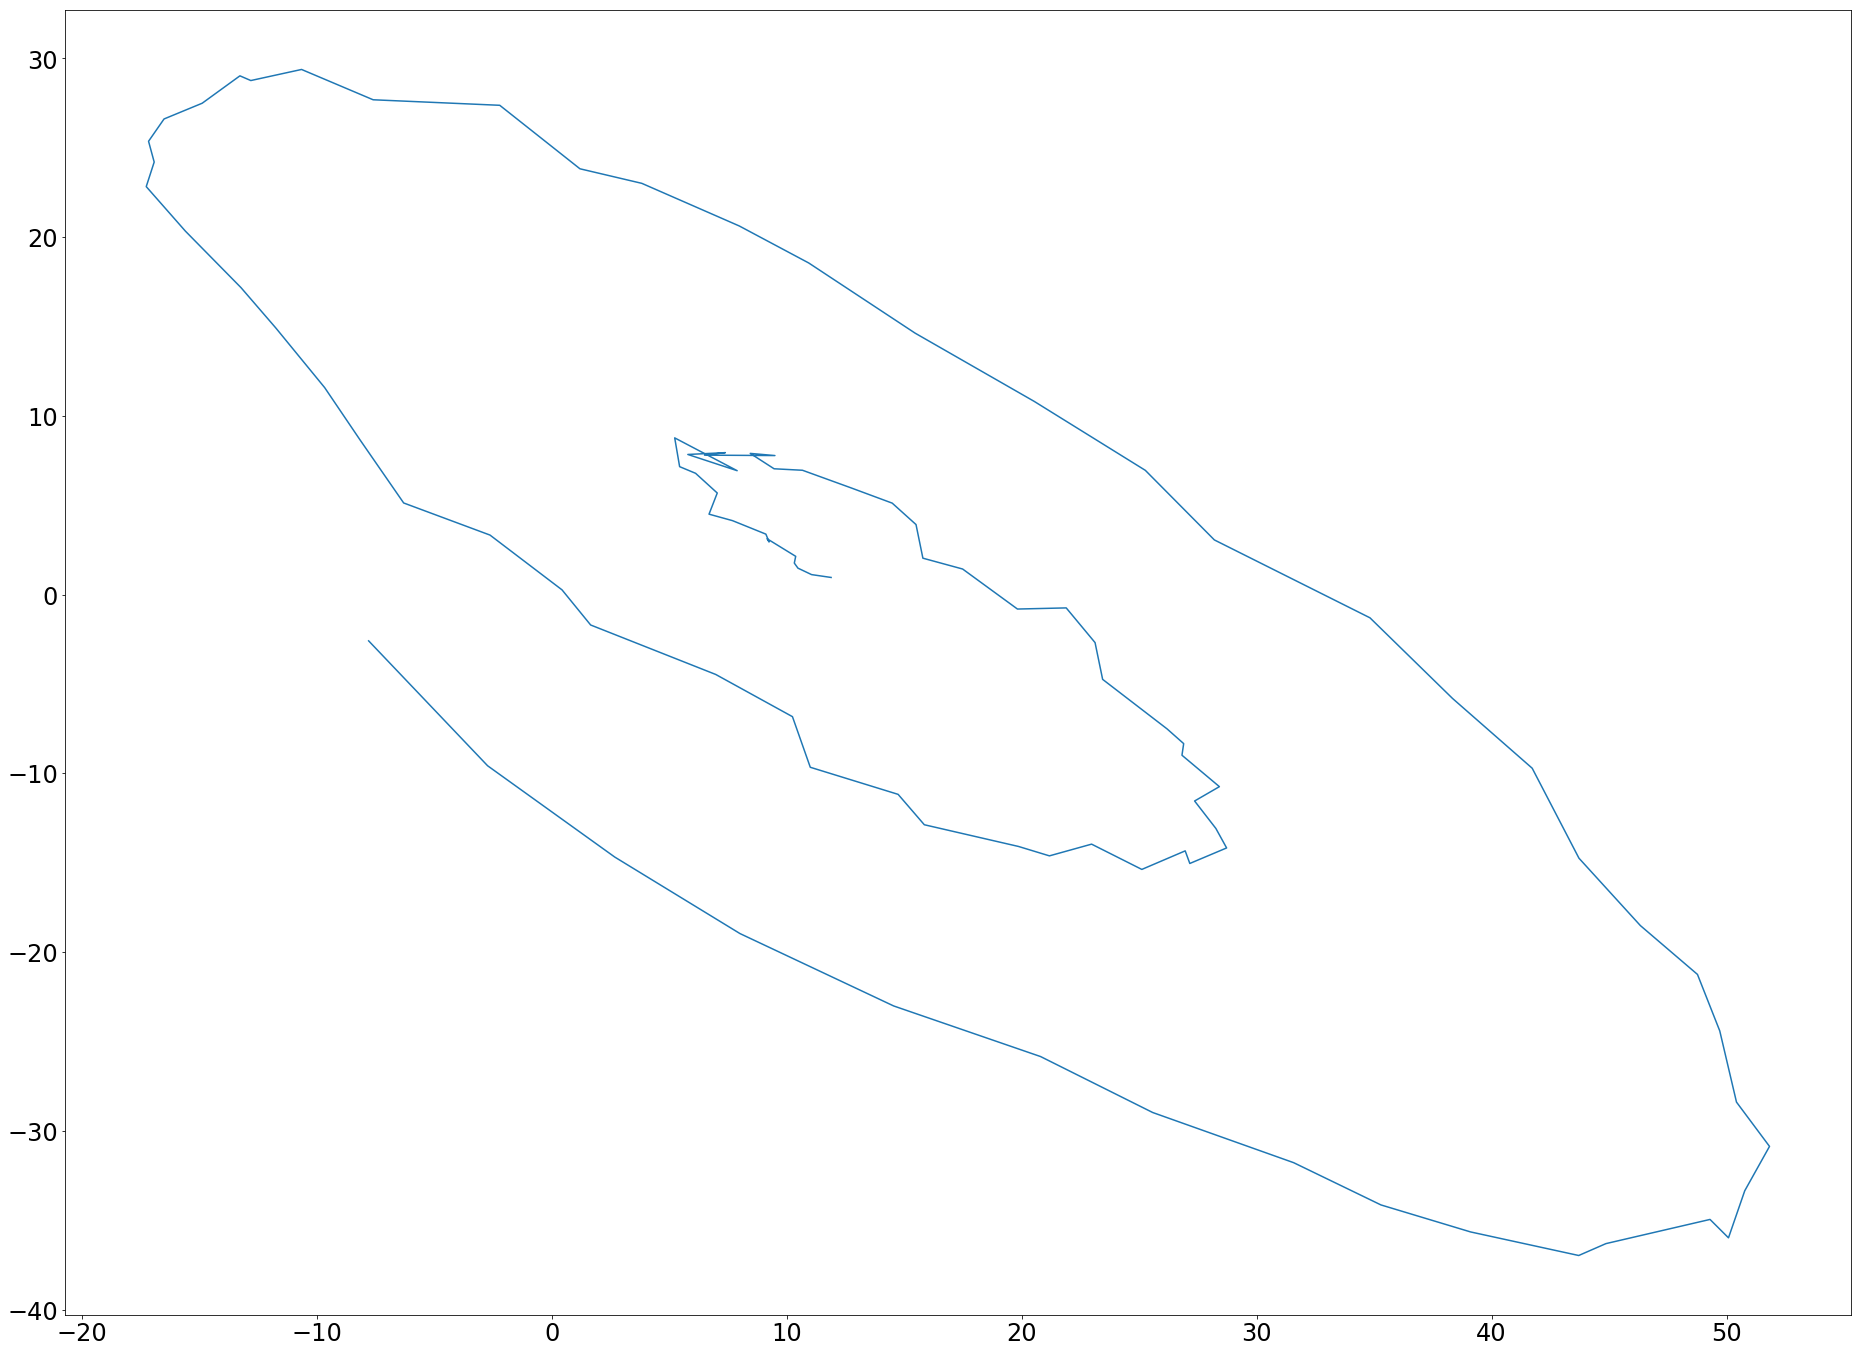

In [34]:
x = np.linspace(0, 4*np.pi, 100).reshape(-1, 1)
f_non_lin = np.hstack((np.multiply(x, np.sin(x)), np.multiply(x, np.cos(x))))
A = np.random.randn(10, 2)
y = A.dot(f_non_lin.T).T + (0.2 * np.random.randn(100, 10) + 5)

def C(W):
    sigma = 1
    return np.dot(W, np.transpose(W)) + sigma ** 2

def f(x, *args):
    x = np.reshape(x, (10, 2))
    val = 1 + np.log(np.linalg.det(C(x))) + np.trace(np.dot(y, np.linalg.inv(C(x))).dot(np.transpose(y)))
    return val

def dfx(x, *args):
    x = np.reshape(x, (10, 2))
    delC = np.dot(x, np.identity(np.shape(x)[1])) + np.dot(np.identity(np.shape(x)[0]), x)
    delLog = np.trace(np.dot(np.linalg.inv(C(x)), delC))
    delTr = np.trace(np.dot(y.T, y).dot(-1 * np.dot(np.linalg.inv(C(x)), delC).T.dot(np.linalg.inv(C(x))).T))
    val = delLog + delTr
    return val

x0 = np.random.randn(10, 2).flatten()
try:
    x_star = opt.fmin_cg(f, x0, fprime=dfx)
    x_star = x_star.reshape((10,2))
    xP = np.dot(x_star.T, y.T)

    plt.figure()
    plt.plot(xP[0], xP[1])
    plt.show()
except:
    print("Uh oh")

### 22 ###

It is the simplest possible model since it places a uniform probability mass over the entire space which is mathematically very nice.

It is the most complex model since it places a uniform probability mass over the entire space and so tries to spread the probability mass over the entire dataset space which could lead to the model being penalised by Bayes' Rule.

### 25 ###

We see that the sum of the evidence over the entire dataspace for every model is about 1. This is the expected outcome since we are essentially integrating our probability distribution to get the area under the curve which should sum to one.

In [39]:
x = np.array(list(it.product([-1, 0, 1], repeat=2)))
y = np.array(list(it.product([-1, 1], repeat=9)))

def visualise(y, ax=None):
    if ax == None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.scatter(x[np.where(y == -1)][:,0], x[np.where(y == -1)][:,1], marker='o', s=1000)
    ax.scatter(x[np.where(y == 1)][:,0], x[np.where(y == 1)][:,1], marker='X', s=1000)

def Mi(y, theta, i=0):
    if i == 0:
        return 1 / 512
    theta = np.reshape(theta, (-1, 1))
    biasX = np.ones((x.shape[0], x.shape[1]+1))
    biasX[:,:-1] = x
    e = -1 * y * np.dot(theta.T, biasX.T)
    return np.prod(1 / (1 + np.exp(e)))

def prior(i=0):
    if i == 0:
        return 0;
    sample = np.random.multivariate_normal(np.zeros((i)), 10 ** 3 * np.identity(i))
    padding = np.zeros((3))
    padding[:len(sample)] = sample
    return padding

def integration(y, i=0, priorFunc=None):
    if priorFunc == None:
        priorFunc = prior
    S = 10 ** 2
    return (1/S) * np.sum([Mi(y, priorFunc(i), i) for j in range(S)])

evidence0 = np.reshape([integration(y_i) for y_i in y], (-1, 1))
evidence1 = np.reshape([integration(y_i, 1) for y_i in y], (-1, 1))
evidence2 = np.reshape([integration(y_i, 2) for y_i in y], (-1, 1))
evidence3 = np.reshape([integration(y_i, 3) for y_i in y], (-1, 1))

print("Model 0: ", np.sum(evidence0))
print("Model 1: ", np.sum(evidence1))
print("Model 2: ", np.sum(evidence2))
print("Model 3: ", np.sum(evidence3))

Model 0:  1.0
Model 1:  0.994663485083
Model 2:  1.00860166182
Model 3:  0.932000999187


### 26  and 27 ###

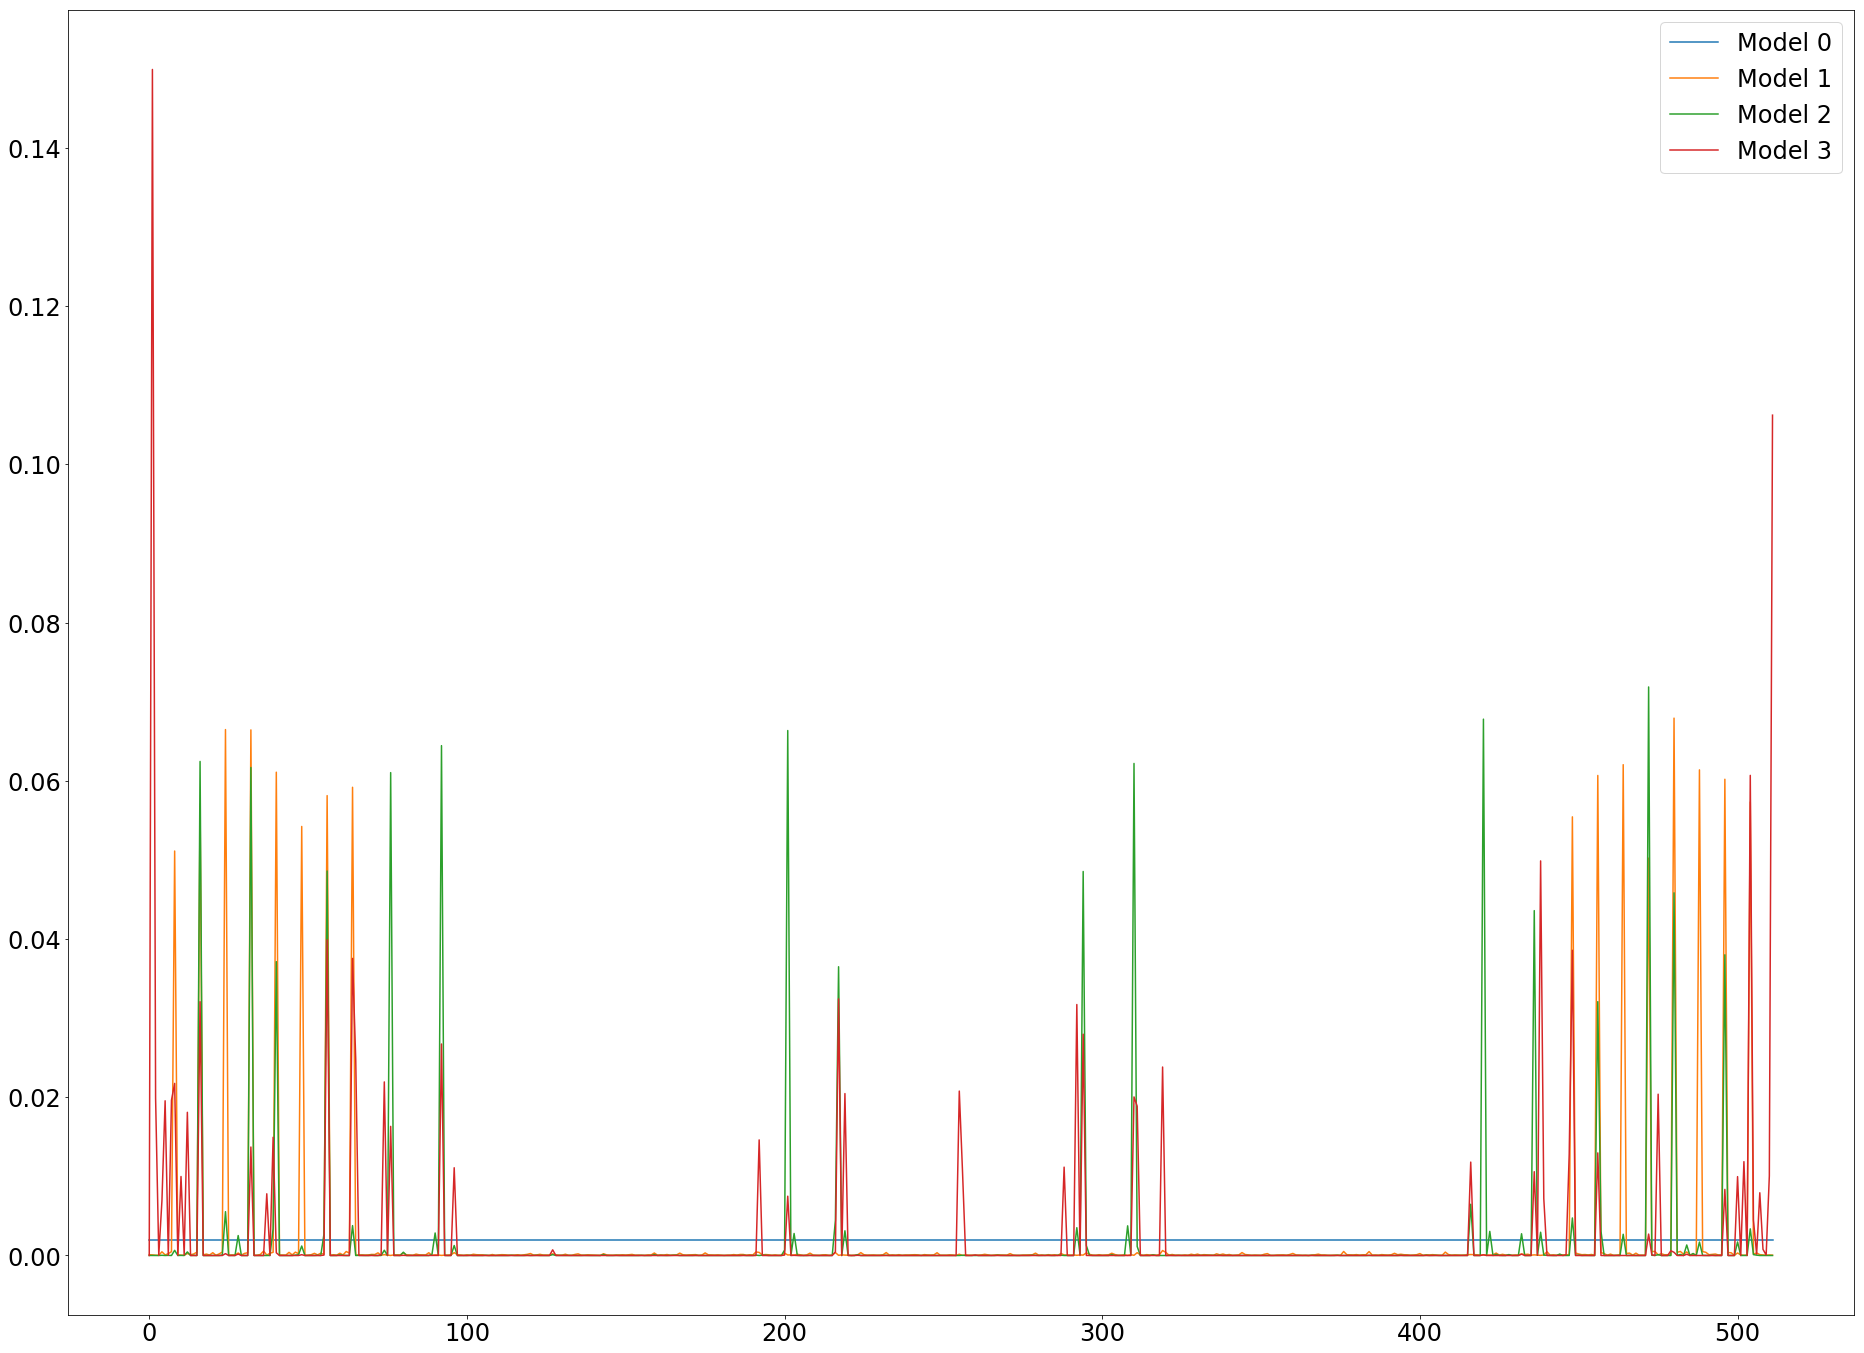

Model 0


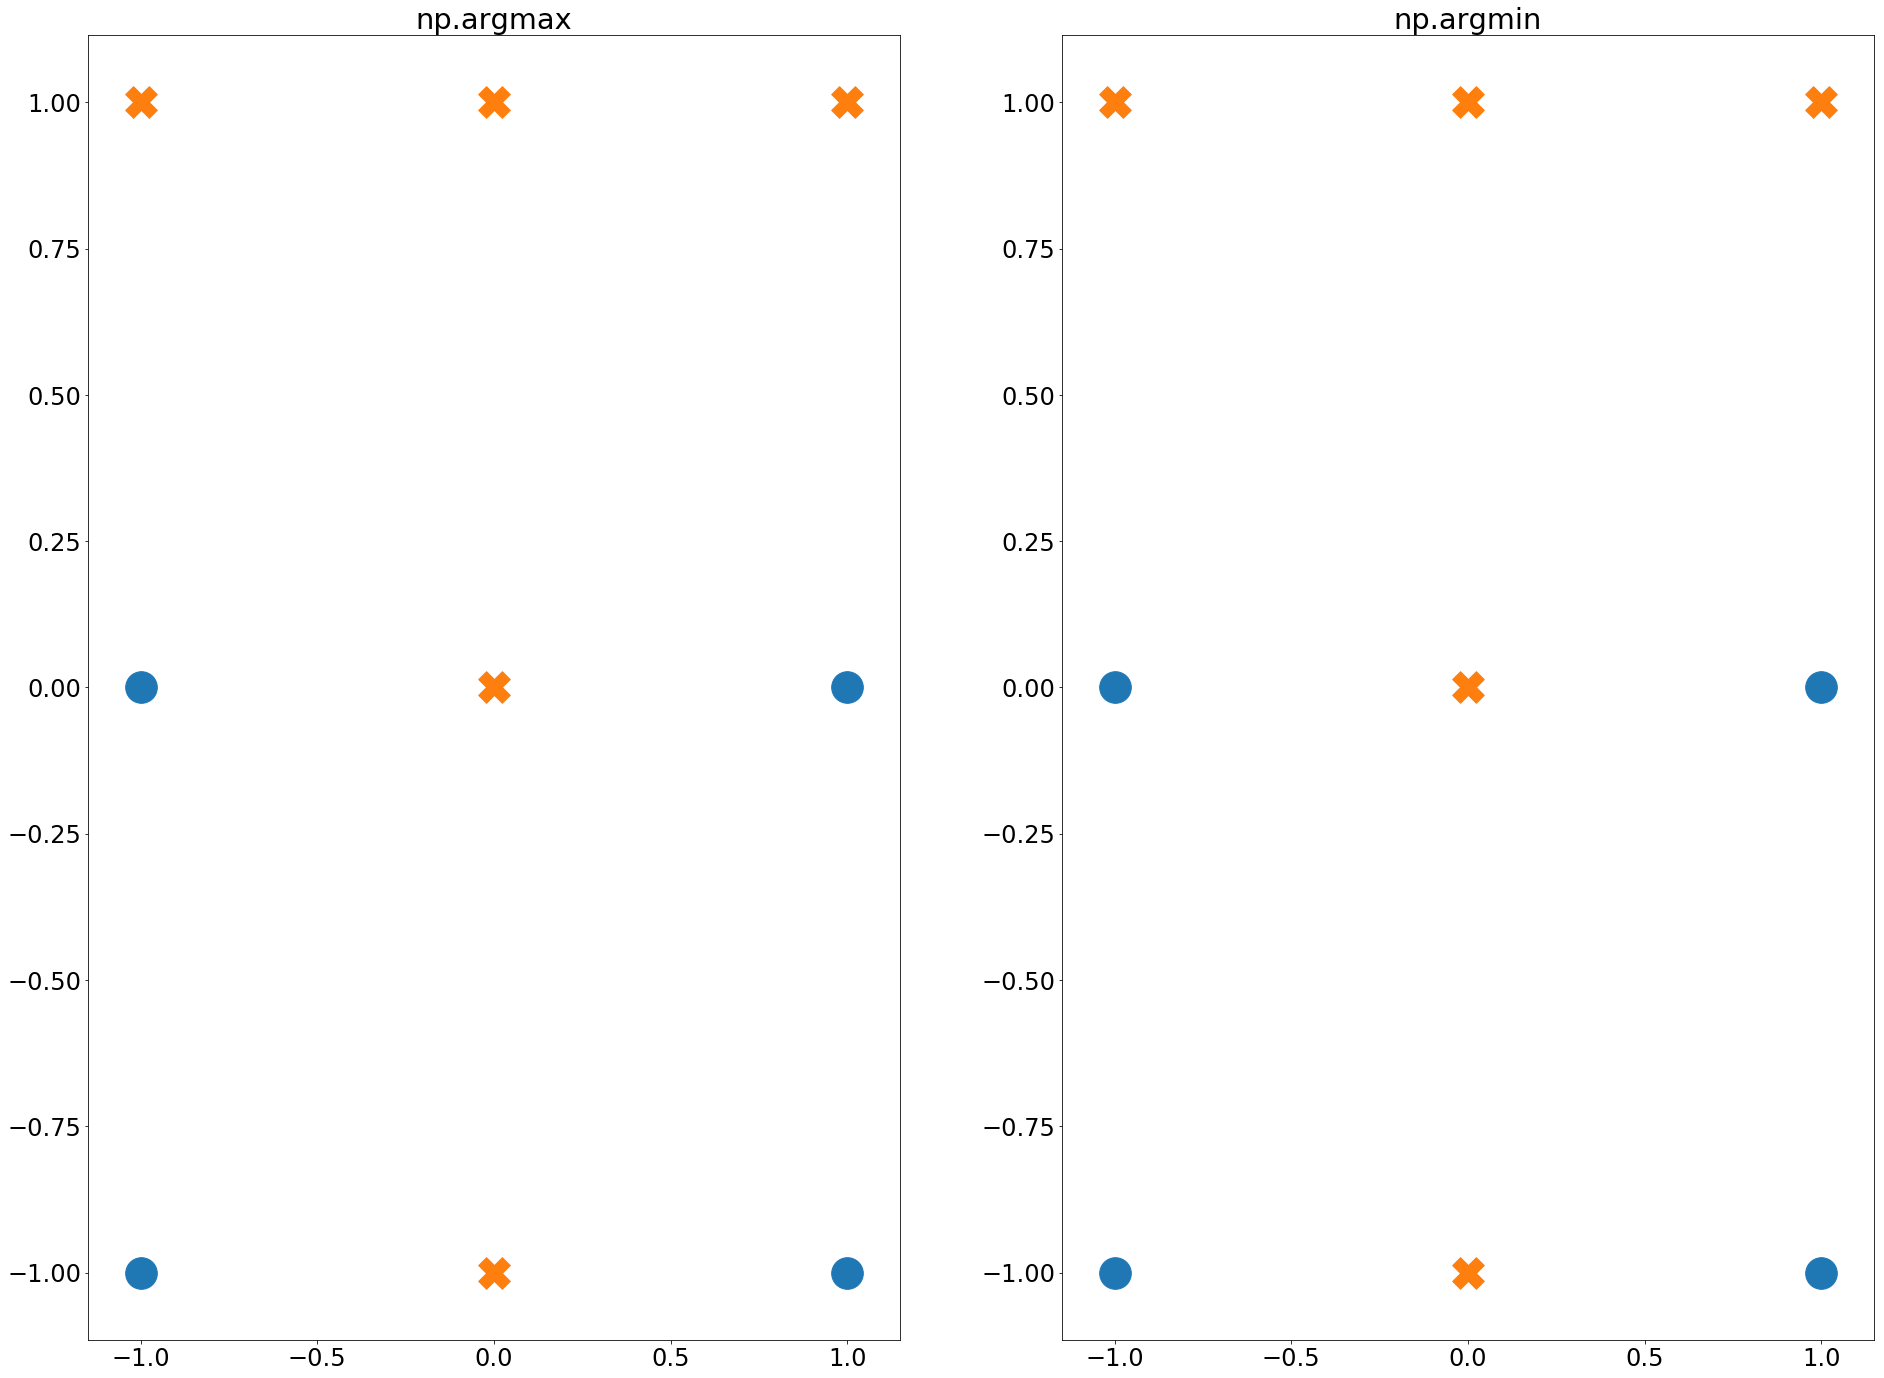

Model 1


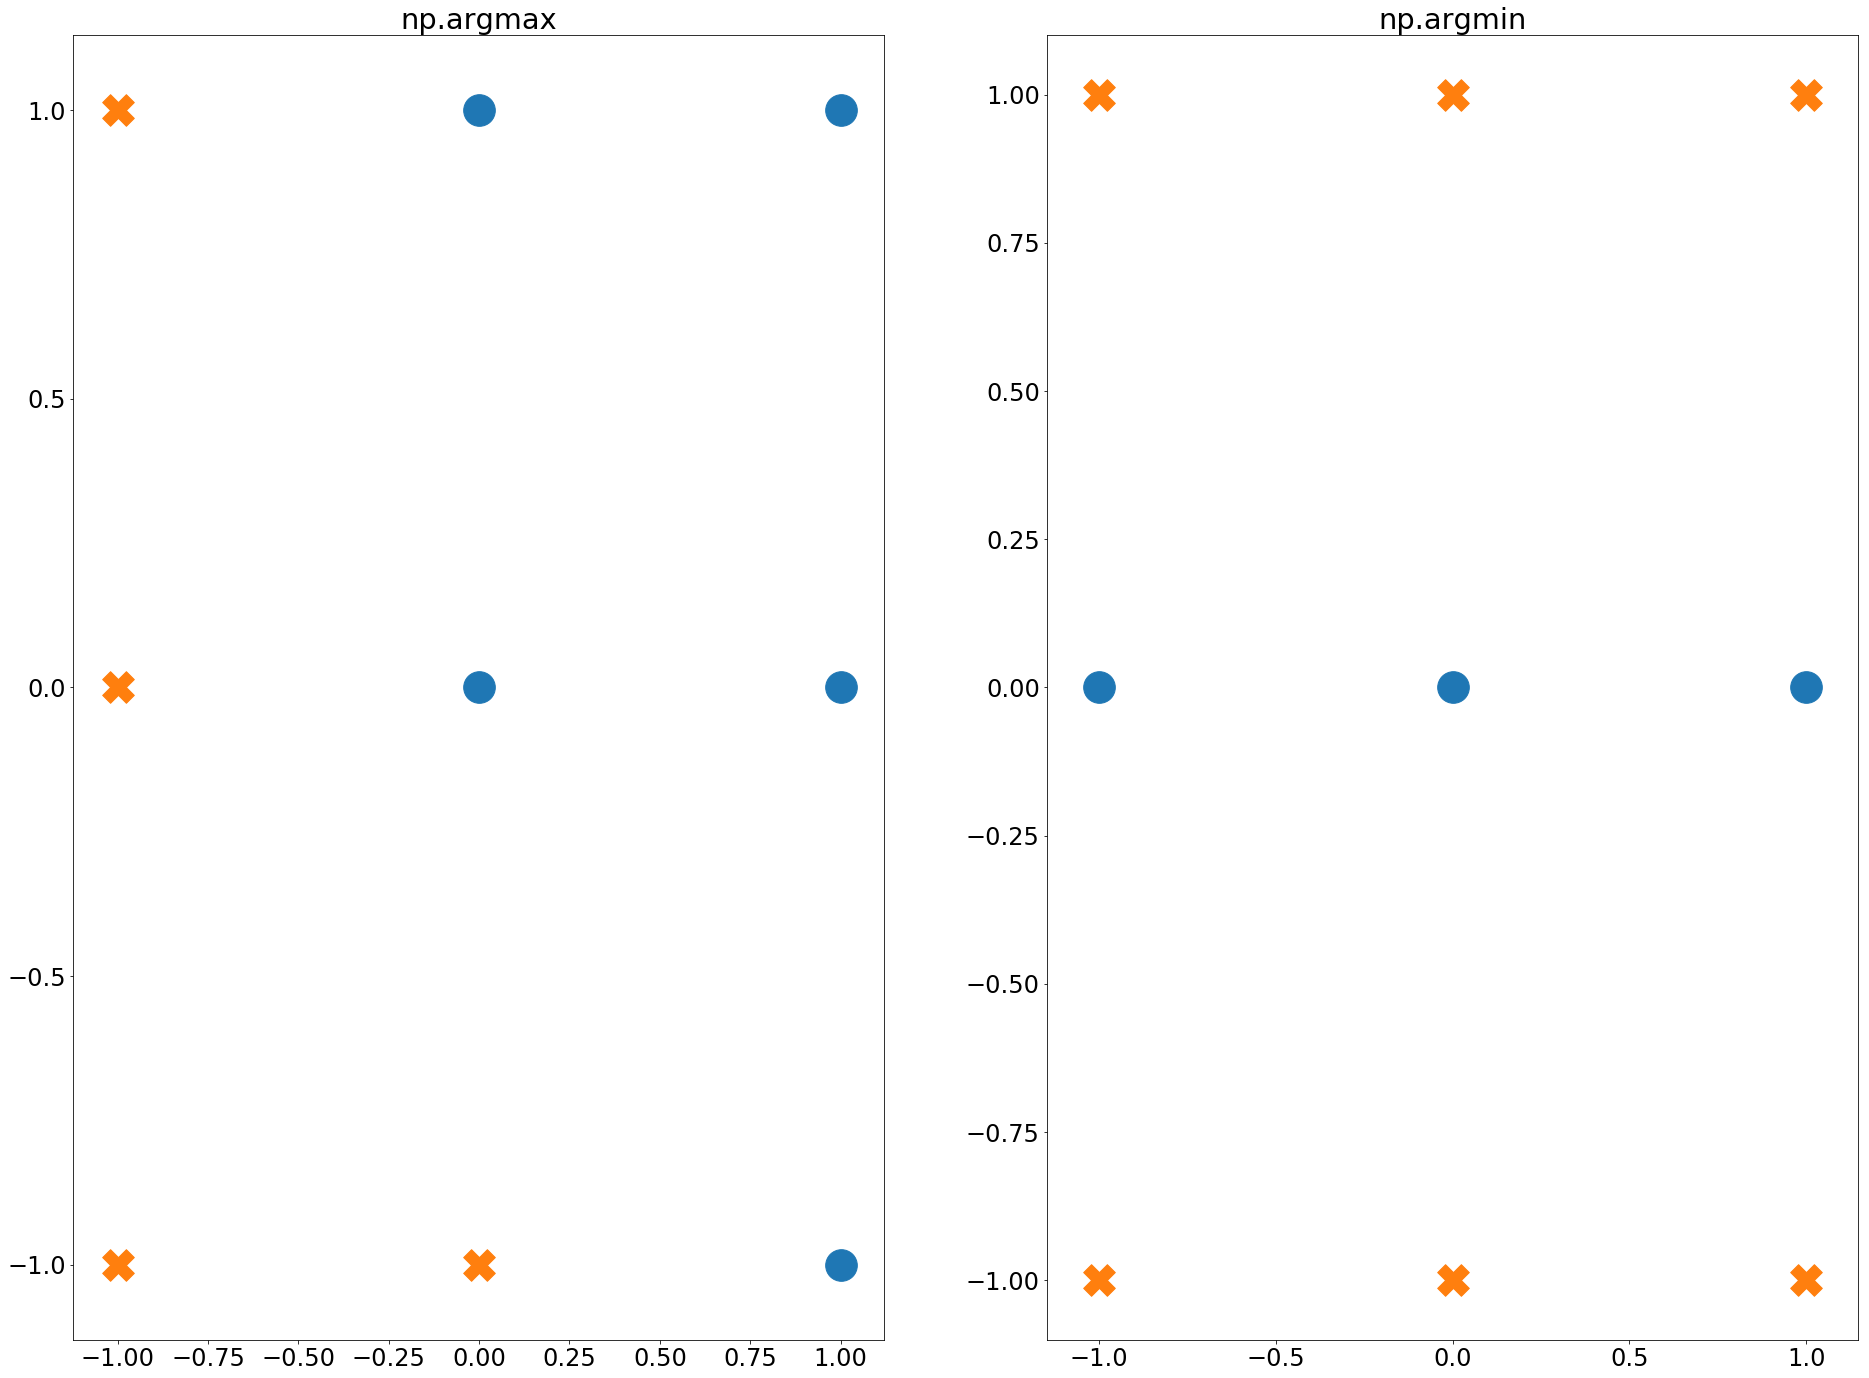

Model 2


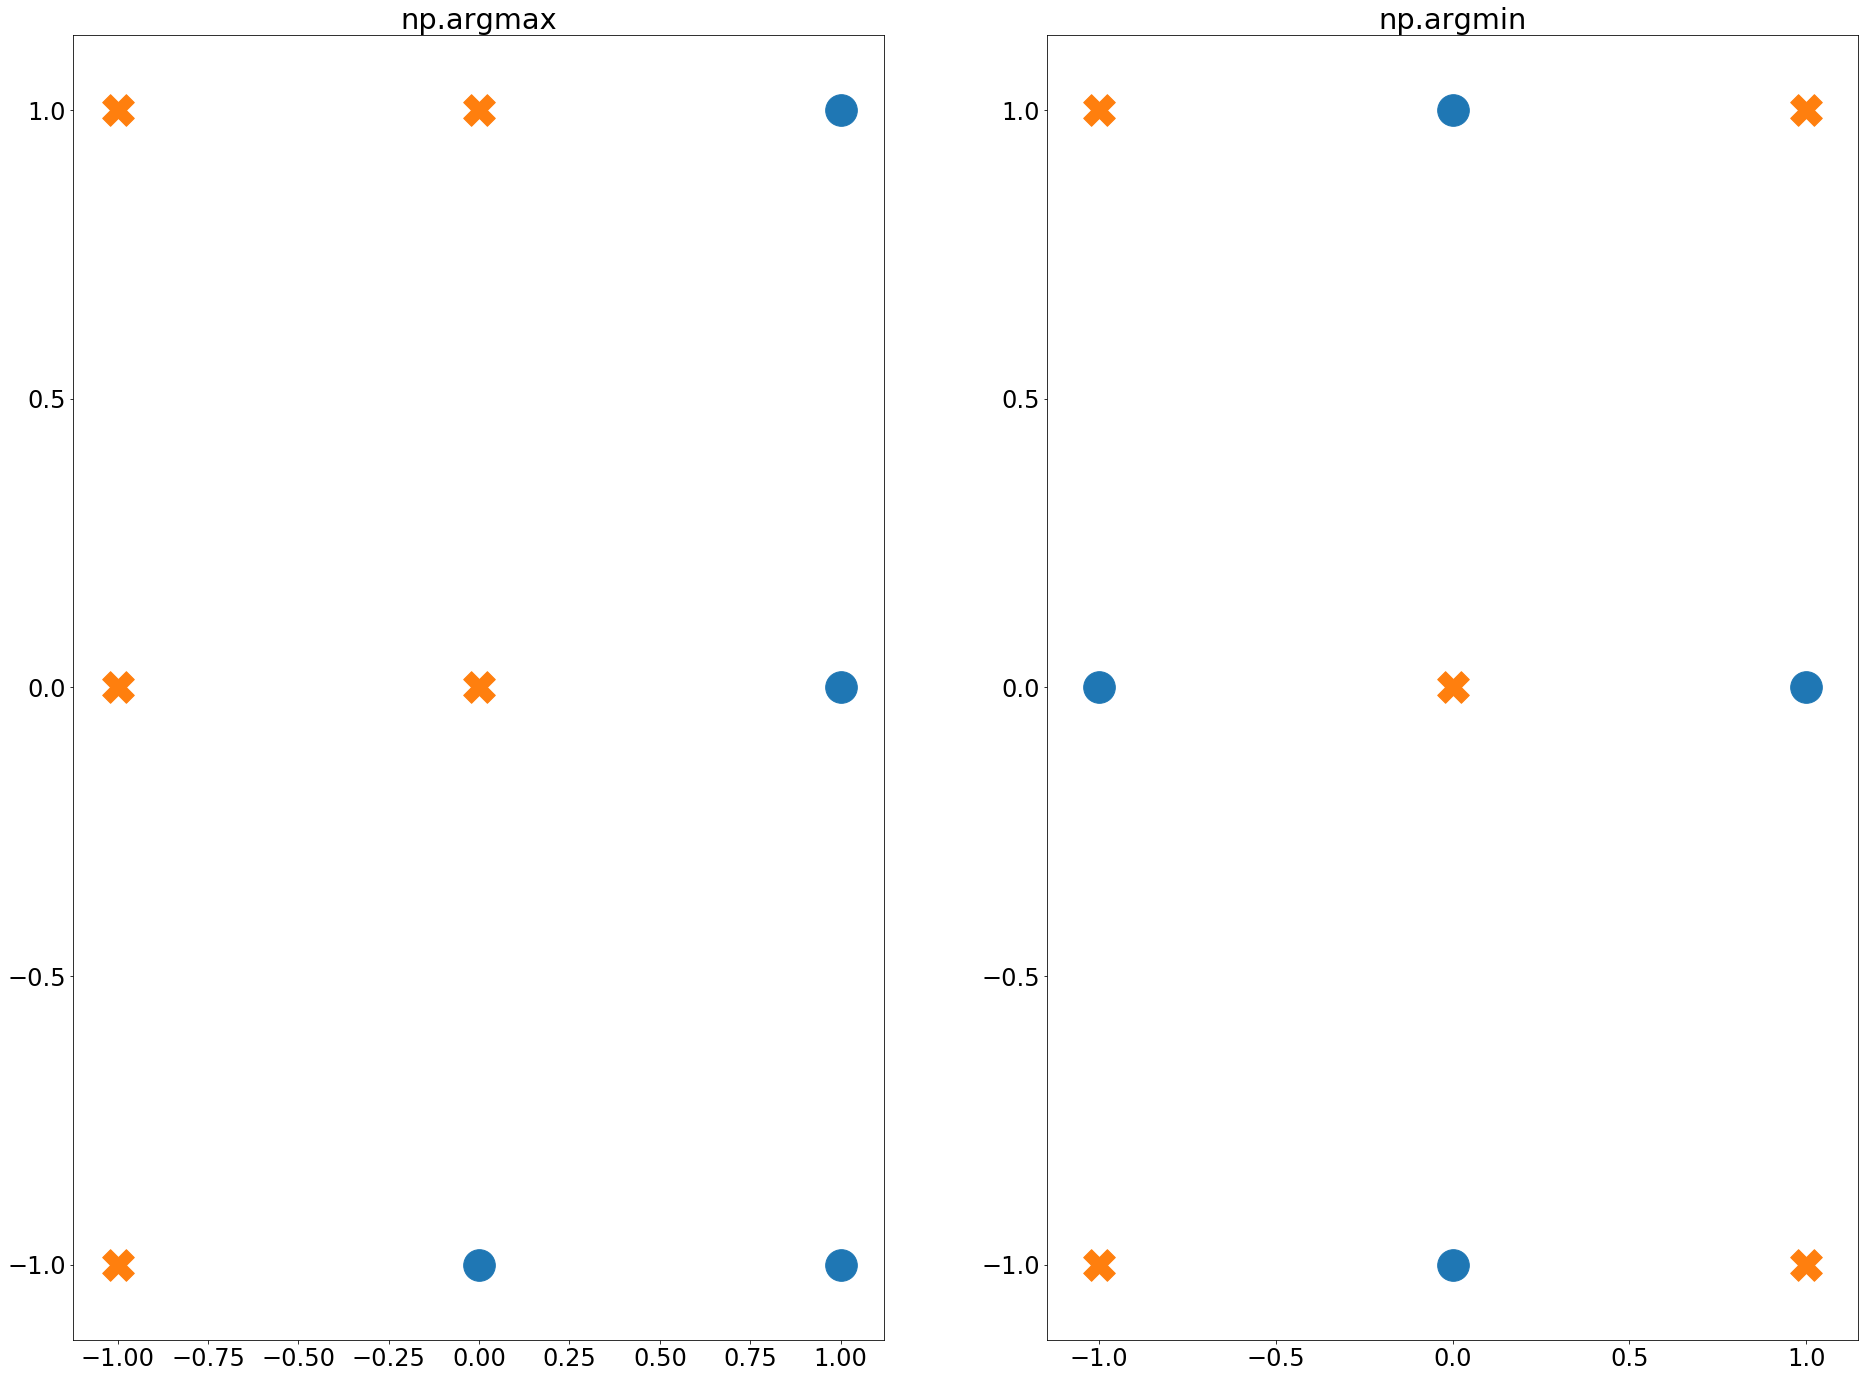

Model 3


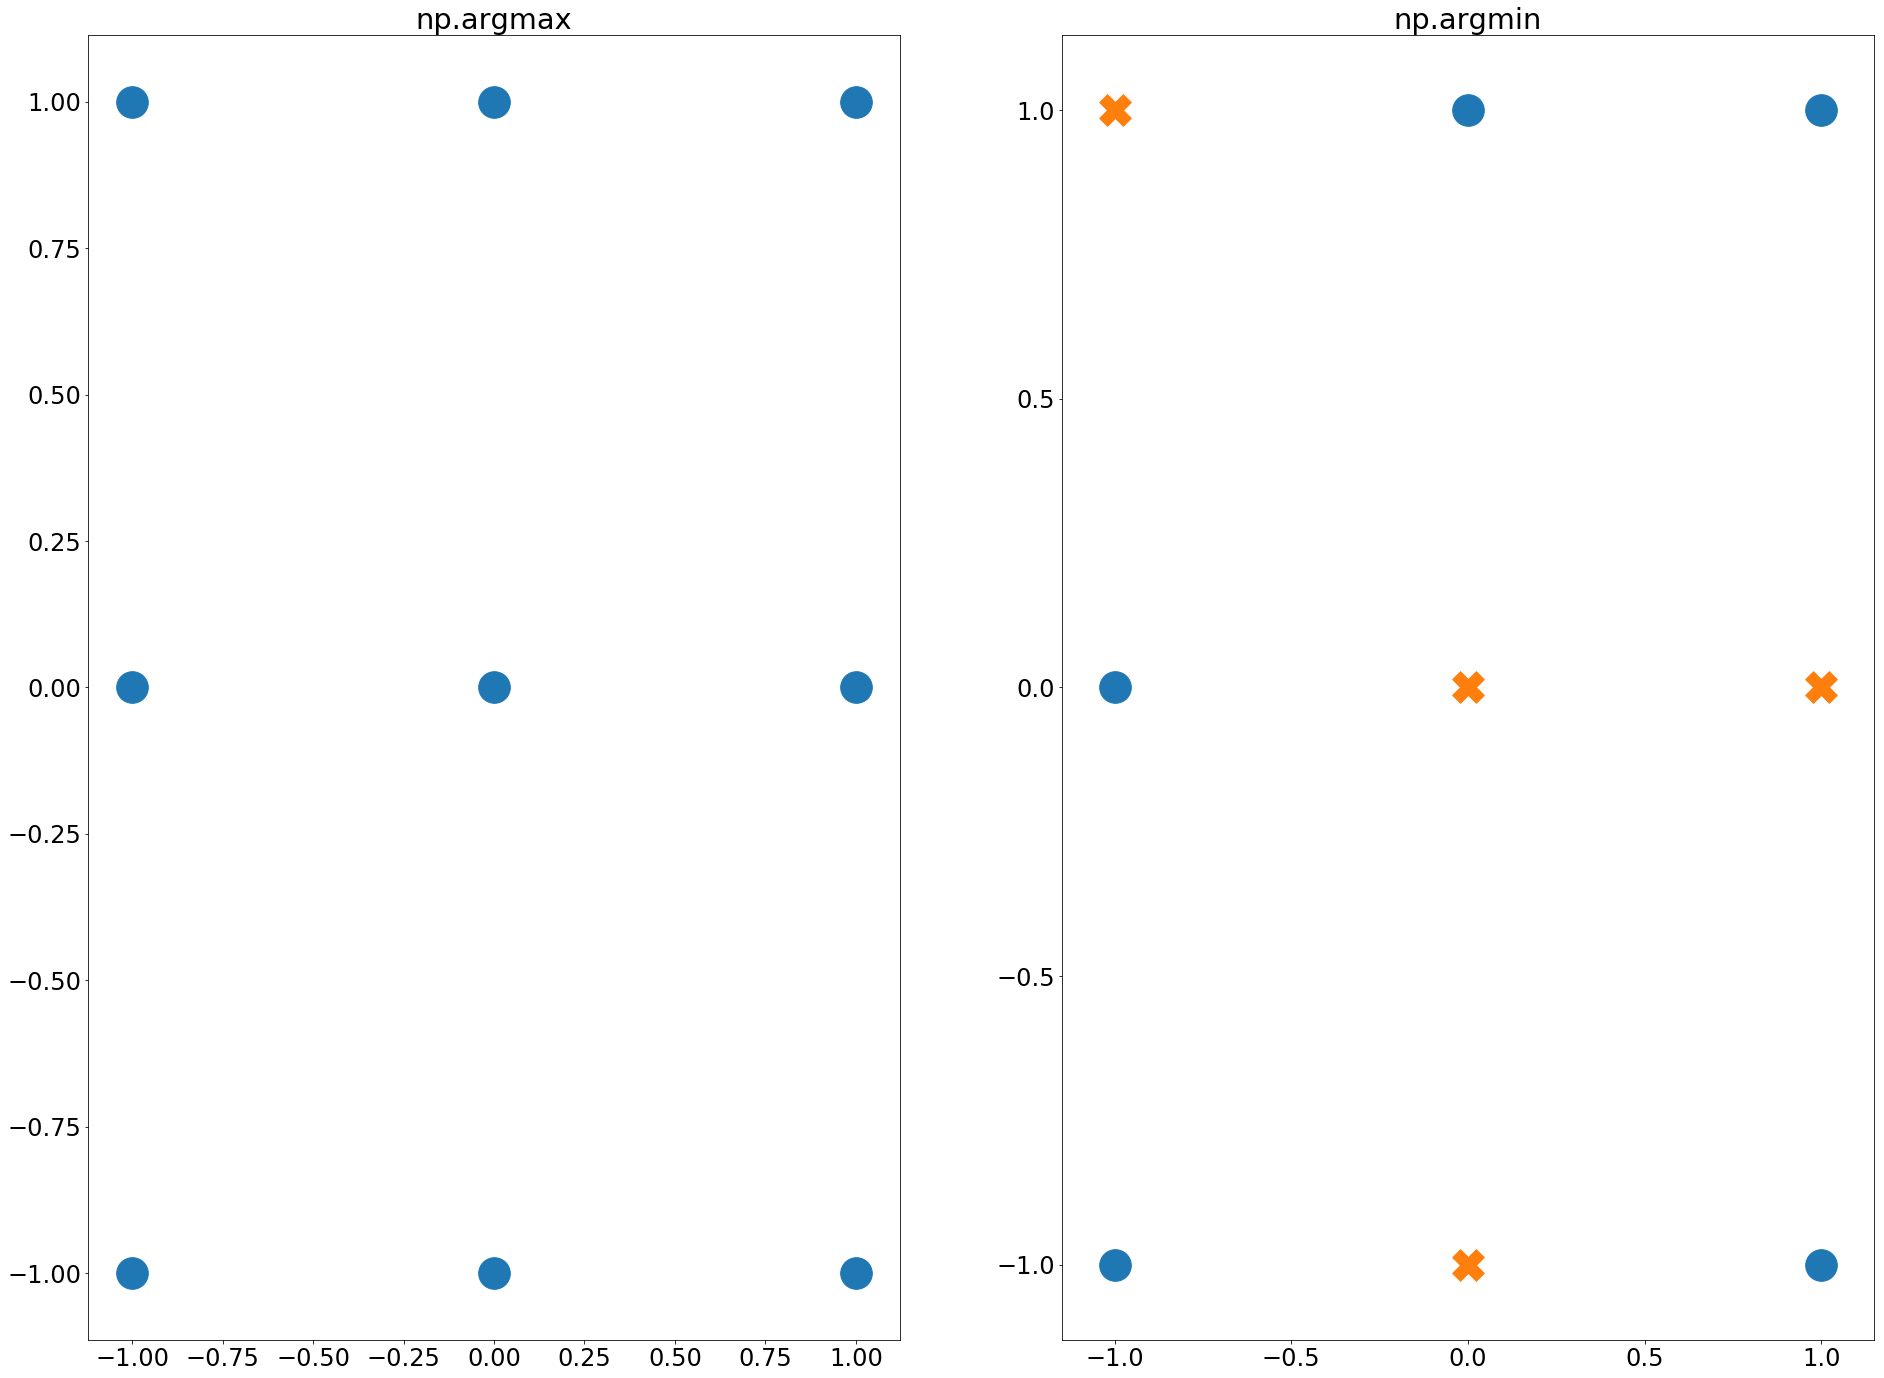

In [40]:
def dist(i, j):
    return np.sum([evidence0[i] - evidence0[j], evidence1[i] - evidence1[j], evidence2[i] - evidence2[j], evidence3[i] - evidence3[j]])

# Ordering algo
evidenceSum = evidence0 + evidence1 + evidence2 + evidence3
idx = np.argmin(evidenceSum)
L = y[idx]
y = np.delete(y, idx, 0)
evidence0 = np.delete(evidence0, idx, 0)
evidence1 = np.delete(evidence1, idx, 0)
evidence2 = np.delete(evidence2, idx, 0)
evidence3 = np.delete(evidence3, idx, 0)
newY = [L]
while (y.shape[0] > 0):
    dists = np.array([dist(idx, i) for i in range(y.shape[0])])
    N = dists[np.where((dists < (dists[np.argmin(dists)] + 0.000005)) & (dists > (dists[np.argmin(dists)] - 0.000005)))[0]]
    if len(N) == 0:
        idx = np.argmin(dists)
    else:
        idx = np.argmax(N)
    L = y[idx]
    y = np.delete(y, idx, 0)
    evidence0 = np.delete(evidence0, idx, 0)
    evidence1 = np.delete(evidence1, idx, 0)
    evidence2 = np.delete(evidence2, idx, 0)
    evidence3 = np.delete(evidence3, idx, 0)
    newY.append(L)

y = newY
evidence0 = np.reshape([integration(y_i) for y_i in y], (-1, 1))
evidence1 = np.reshape([integration(y_i, 1) for y_i in y], (-1, 1))
evidence2 = np.reshape([integration(y_i, 2) for y_i in y], (-1, 1))
evidence3 = np.reshape([integration(y_i, 3) for y_i in y], (-1, 1))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(y)), evidence0, label="Model 0")
ax.plot(range(len(y)), evidence1, label="Model 1")
ax.plot(range(len(y)), evidence2, label="Model 2")
ax.plot(range(len(y)), evidence3, label="Model 3")
ax.legend()
plt.show()

print("Model 0")
hiIdx = np.argmax(evidence0)
lowIdx = np.argmin(evidence0)
fig = plt.figure()
ax = fig.add_subplot(121)
ax.set_title("np.argmax")
visualise(y[hiIdx], ax)
ax = fig.add_subplot(122)
ax.set_title("np.argmin")
visualise(y[lowIdx], ax)
plt.show()

print("Model 1")
hiIdx = np.argmax(evidence1)
lowIdx = np.argmin(evidence1)
fig = plt.figure()
ax = fig.add_subplot(121)
visualise(y[hiIdx], ax)
ax.set_title("np.argmax")
ax = fig.add_subplot(122)
visualise(y[lowIdx], ax)
ax.set_title("np.argmin")
plt.show()

print("Model 2")
hiIdx = np.argmax(evidence2)
lowIdx = np.argmin(evidence2)
fig = plt.figure()
ax = fig.add_subplot(121)
visualise(y[hiIdx], ax)
ax.set_title("np.argmax")
ax = fig.add_subplot(122)
visualise(y[lowIdx], ax)
ax.set_title("np.argmin")
plt.show()

print("Model 3")
hiIdx = np.argmax(evidence3)
lowIdx = np.argmin(evidence3)
fig = plt.figure()
ax = fig.add_subplot(121)
visualise(y[hiIdx], ax)
ax.set_title("np.argmax")
ax = fig.add_subplot(122)
visualise(y[lowIdx], ax)
ax.set_title("np.argmin")
plt.show()

def newPrior(i=0):
    if i == 0:
        return 0;
    sample = np.random.multivariate_normal(np.ones((i)) * 5, 10 ** 3 * np.identity(i))
    padding = np.zeros((3))
    padding[:len(sample)] = sample
    return padding

### 30 ###

Throughout this assignment, we have created and understood parametric and non-parametric models. We have learned the differences and uses of different model types and gaussian processes, as well as deriving and performing marginalisations amongst other things. We feel the purpose of performing this assignment has been to give as a "hands-on" approach to machine learning, and provide a clearer picture of what everything does.
